# Tesco Large
#### 算price elasticity的时候把数字四舍五入了

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import statsmodels.api as sm 
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



## Exploration of the dataset 

In [3]:
pd.plotting.register_matplotlib_converters()

In [4]:
mcv_digs=pd.read_excel("14-20 Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_digs.head()

SDESC  Units  Volume    Value  Distribution  \
0  WE 13.12.14  26252  6563.0  23366.0            97   
1  WE 20.12.14  28719  7179.8  25560.4            97   
2  WE 27.12.14  26468  6617.0  23557.3            97   
3  WE 03.01.15  19371  4842.8  17240.9            97   
4  WE 10.01.15  19424  4856.0  17286.2            97   

   Promotional Distribution    £/unit      £/kg  
0                         0  0.890066  3.560262  
1                         0  0.890017  3.560043  
2                         0  0.890029  3.560118  
3                         0  0.890037  3.560110  
4                         0  0.889940  3.559761

In [5]:
def dataframe(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    return x

In [6]:
mcv_digs=dataframe(mcv_digs)
mcv_digs.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Date  Units  Volume    Value  Distribution  Promotional Distribution  \
0 2014-12-13  26252  6563.0  23366.0            97                         0   
1 2014-12-20  28719  7179.8  25560.4            97                         0   
2 2014-12-27  26468  6617.0  23557.3            97                         0   
3 2015-01-03  19371  4842.8  17240.9            97                         0   
4 2015-01-10  19424  4856.0  17286.2            97                         0   

     £/unit      £/kg  
0  0.890066  3.560262  
1  0.890017  3.560043  
2  0.890029  3.560118  
3  0.890037  3.560110  
4  0.889940  3.559761

In [7]:
mcv_digs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 8 columns):
Date                        275 non-null datetime64[ns]
Units                       275 non-null int64
Volume                      275 non-null float64
Value                       275 non-null float64
Distribution                275 non-null int64
Promotional Distribution    275 non-null int64
£/unit                      275 non-null float64
£/kg                        275 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 17.3 KB


In [8]:
def info(df):
    print('Dataset has: ' + str(len(df.index)) + 'rows')
    
    print('Missing values:') 
    print(df.isnull().sum())
    
    print('Screen out distribution>100:')
    print(df[df.Distribution>100].count(axis=0))
    
    print('Screen out negative data: ')
    print(df[df.iloc[:,1:8]<0].count(axis=0))


In [9]:
info(mcv_digs)

Dataset has: 275rows
Missing values:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
dtype: int64
Screen out distribution>100:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
dtype: int64
Screen out negative data: 
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
dtype: int64


In [10]:
# check if there are missing values
# mcv_digs.isnull().sum()

In [11]:
# screen out distribution>100 distribution
# mcv_digs[mcv_digs.Distribution>100].count(axis=0)

In [12]:
# screen out negative values
# mcv_digs[mcv_digs.iloc[:,1:8]<0].count(axis=0)

In [13]:
mcv_digs.describe()

Units       Volume         Value  Distribution  \
count    275.000000   275.000000    275.000000    275.000000   
mean   20520.490909  5130.149455  18329.931636     80.490909   
std     4210.161155  1052.540572   3749.070151     14.825841   
min     8867.000000  2216.800000   7880.100000     58.000000   
25%    17533.500000  4383.400000  15739.200000     68.000000   
50%    20591.000000  5147.800000  18365.200000     75.000000   
75%    23810.000000  5952.550000  21191.250000     97.000000   
max    34927.000000  8731.800000  31083.300000     99.000000   

       Promotional Distribution      £/unit        £/kg  
count                     275.0  275.000000  275.000000  
mean                        0.0    0.893456    3.573803  
std                         0.0    0.016671    0.066685  
min                         0.0    0.857718    3.430872  
25%                         0.0    0.889881    3.559501  
50%                         0.0    0.890022    3.560074  
75%                         0.0    0.890830    3.563291  
max                         0.0    1.000000    3.999962

In [14]:
# splitting up 'Date' data into before defined columns
mcv_digs['year'] = pd.DatetimeIndex(mcv_digs['Date']).year
# month as number
mcv_digs['month'] = pd.DatetimeIndex(mcv_digs['Date']).month
# month in written form
mcv_digs['month_name'] = mcv_digs['Date'].dt.month_name()
# day as number
mcv_digs['day'] = mcv_digs['Date'].dt.dayofweek
# day in written form
# mcv_digs['weekday'] = mcv_digs['Date'].dt.day_name()

In [15]:
mcv_digs['Date'] = pd.to_datetime(mcv_digs['Date']).dt.normalize()
mcv_digs['week-year'] = mcv_digs['Date'].dt.strftime('%Y-%U') 
mcv_digs['month-year'] = mcv_digs['Date'].dt.strftime('%Y-%m') 
mcv_digs.head()

Date  Units  Volume    Value  Distribution  Promotional Distribution  \
0 2014-12-13  26252  6563.0  23366.0            97                         0   
1 2014-12-20  28719  7179.8  25560.4            97                         0   
2 2014-12-27  26468  6617.0  23557.3            97                         0   
3 2015-01-03  19371  4842.8  17240.9            97                         0   
4 2015-01-10  19424  4856.0  17286.2            97                         0   

     £/unit      £/kg  year  month month_name  day week-year month-year  
0  0.890066  3.560262  2014     12   December    5   2014-49    2014-12  
1  0.890017  3.560043  2014     12   December    5   2014-50    2014-12  
2  0.890029  3.560118  2014     12   December    5   2014-51    2014-12  
3  0.890037  3.560110  2015      1    January    5   2015-00    2015-01  
4  0.889940  3.559761  2015      1    January    5   2015-01    2015-01

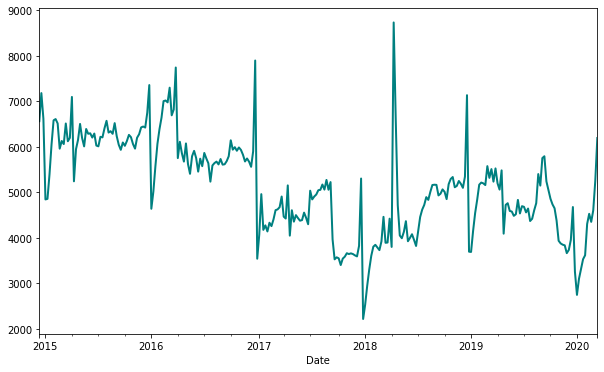

In [16]:
mcv_digs.groupby('Date')['Volume'].sum().plot(kind='line', figsize=(10,6), color="teal",  linewidth=2)


Text(0.5, 0, 'Week of Year')

Text(0, 0.5, 'Total Sales of Digestives')

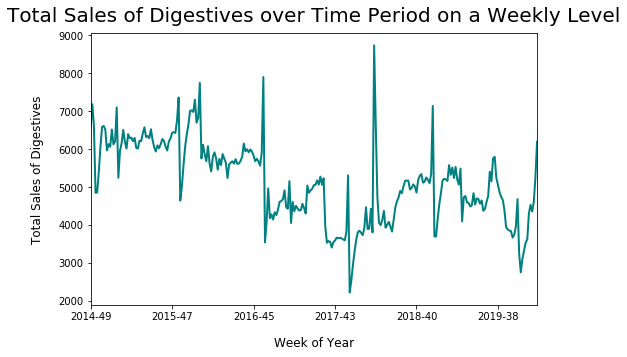

In [17]:
# Plot total sales of digestives per week over time periode
mcv_digs.groupby('week-year')['Volume'].sum().plot(kind='line', figsize=(8,5), color="teal",  linewidth=2)

#set title
plt.title('Total Sales of Digestives over Time Period on a Weekly Level', fontsize = 20).set_position([.5, 1.02])

#set x-axis label
plt.xlabel('Week of Year', fontsize = 12, labelpad=15)

#set y-axis label
plt.ylabel('Total Sales of Digestives', fontsize = 12, labelpad=15)

plt.show()

Text(0.5, 0, 'Week of Year')

Text(0, 0.5, 'Total Sales of Digestives')

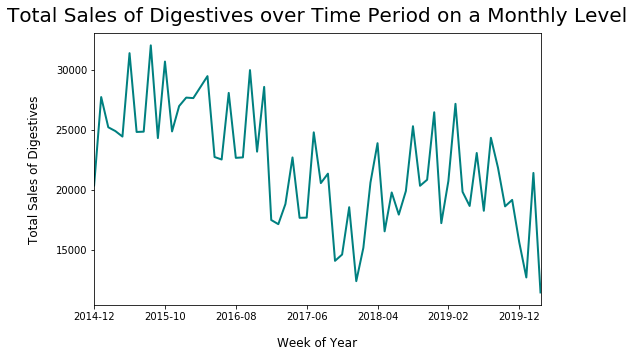

In [18]:
# Plot total sales of digestives per week over time periode
mcv_digs.groupby('month-year')['Volume'].sum().plot(kind='line', figsize=(8,5), color="teal",  linewidth=2)

#set title
plt.title('Total Sales of Digestives over Time Period on a Monthly Level', fontsize = 20).set_position([.5, 1.02])

#set x-axis label
plt.xlabel('Week of Year', fontsize = 12, labelpad=15)

#set y-axis label
plt.ylabel('Total Sales of Digestives', fontsize = 12, labelpad=15)

plt.show()

In [19]:
# Creating new dataset to group by month_name
df1 = mcv_digs[['Volume','month_name']].groupby(['month_name']).sum()
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1 = df1.reindex(month_index, axis=0)
df1 = df1.reset_index()
df1

month_name    Volume
0     January  115193.6
1    February  127290.0
2       March  131458.6
3       April  120309.0
4         May  106969.2
5        June  107863.3
6        July  113882.6
7      August  119479.9
8   September  115484.9
9     October  113685.7
10   November  102639.1
11   December  136535.2

(-1, 12)

([<matplotlib.axis.XTick at 0x123426eb8>,
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Sales in KG')

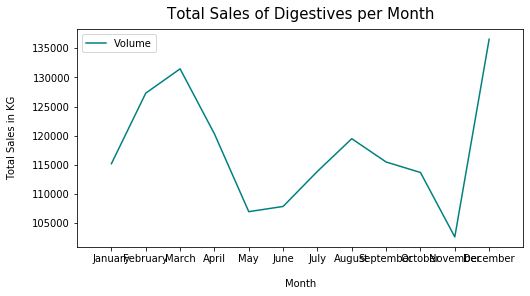

In [20]:
# Plot total sales of digestives per month
df1.plot.line(x='month_name', y='Volume', rot =0, figsize=(8,4), color="teal") 

# setting x limits
plt.xlim(-1, 12);

# setting x ticks
labels = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
plt.xticks(np.linspace(0,12,12, endpoint=False), labels);

plt.title('Total Sales of Digestives per Month', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Month', fontsize = 10, labelpad=15)
plt.ylabel('Total Sales in KG', fontsize = 10, labelpad=15)
plt.show()

[Text(0.5, 1.0, 'Weekly sales distribution')]

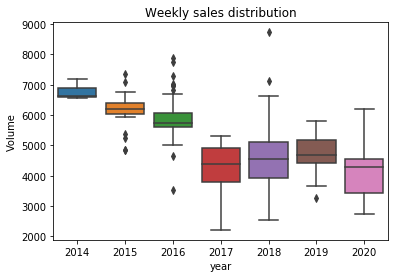

In [21]:
plot = sns.boxplot(x=mcv_digs['year'], y=mcv_digs['Volume'], data=mcv_digs)
plot.set(title='Weekly sales distribution')

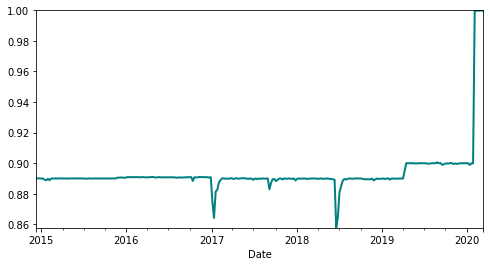

In [22]:
#the trend for unit price
mcv_digs.groupby('Date')['£/unit'].sum().plot(kind='line', figsize=(8,4), color="teal", linewidth=2)
plt.margins(0)

### Preparation for Time Series Models

Apply time series models first: standard time series dataset (date, sales units...). Time series models only require date and sales data, and the models are able to capture the trend and seasonality on their own. It's convenient and straightforward to see the results.

We need to check the stationarity of the dataset first. 
- constant mean and variance

In [23]:
# check ACF & PACF
from statsmodels.tsa import stattools

print('Auto-correlation: \n', stattools.acf(mcv_digs.Volume, nlags=10))
print('Partial Auto-correlation: \n', stattools.pacf(mcv_digs.Volume, nlags=10))

Auto-correlation: 
 [1.         0.78021387 0.68944728 0.65739856 0.62336082 0.61662351
 0.58906559 0.56305509 0.53526258 0.50370061 0.4847055 ]
Partial Auto-correlation: 
 [ 1.          0.78306137  0.21021183  0.19075501  0.09747351  0.138782
  0.04111542  0.03856288  0.00793395 -0.00819519  0.01451916]


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



Tests to check stationarity:
1. Rolling Statistics
    -Plot the moving average or moving variance and see if it varies with time. More of a visual technique.
2. ADCF Test
    -Null hypothesis is that the TS is non-stationary. Compare t-stats and p-value to see if can reject the null or 
    not. 

In [24]:
# extract date and volume columns
sales=mcv_digs[['Date','Volume']]
sales=sales.set_index('Date')
sales.head()

Volume
Date              
2014-12-13  6563.0
2014-12-20  7179.8
2014-12-27  6617.0
2015-01-03  4842.8
2015-01-10  4856.0

In [25]:
#rolling mean and std in a yearly base
rolmean=sales.rolling(window=52).mean()
rolstd=sales.rolling(window=52).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

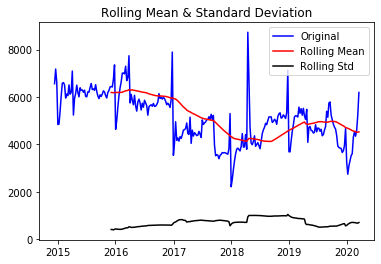

In [26]:
#static graph
origin=plt.plot(sales, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [27]:
#define variables
origin_sales=sales['Volume']
date=mcv_digs['Date']
rol_mean=rolmean['Volume']
rol_std=rolstd['Volume']

#plotly graph
fig = go.Figure()
fig=fig.add_trace(go.Scatter(x=date, y=origin_sales,
                    mode='lines',
                    name='Original Sales'))
fig=fig.add_trace(go.Scatter(x=date, y=rol_mean,
                    mode='lines+markers',
                    name='Rolling Mean'))
fig=fig.add_trace(go.Scatter(x=date, y=rol_std,
                    mode='lines+markers',
                    name='Rolling Std'))
fig.update_layout(title='Rolling Mean & Standard Deviation',
xaxis=dict(title='Month'),
yaxis=dict(title='Sales Volume in KG'))

Rolling mean is not constant, the dataset is not stationary.

In [28]:
#perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest=adfuller(sales['Volume'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.635004
p-value                          0.085976
#Lags Used                       4.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


we are not able to reject the null, thus we confirm that our dataset is not stationary.

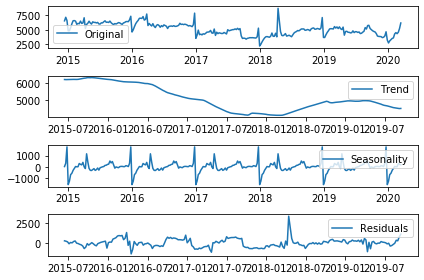

In [29]:
#plot four components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(sales)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation.

In [30]:
# ACF&PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def tsplot(y, title, lags=100, figsize=(12,8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout, (0,0))
    hist_ax=plt.subplot2grid(layout, (0,1))
    acf_ax=plt.subplot2grid(layout, (1,0))
    pacf_ax=plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x124dd7710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124e5ebe0>)

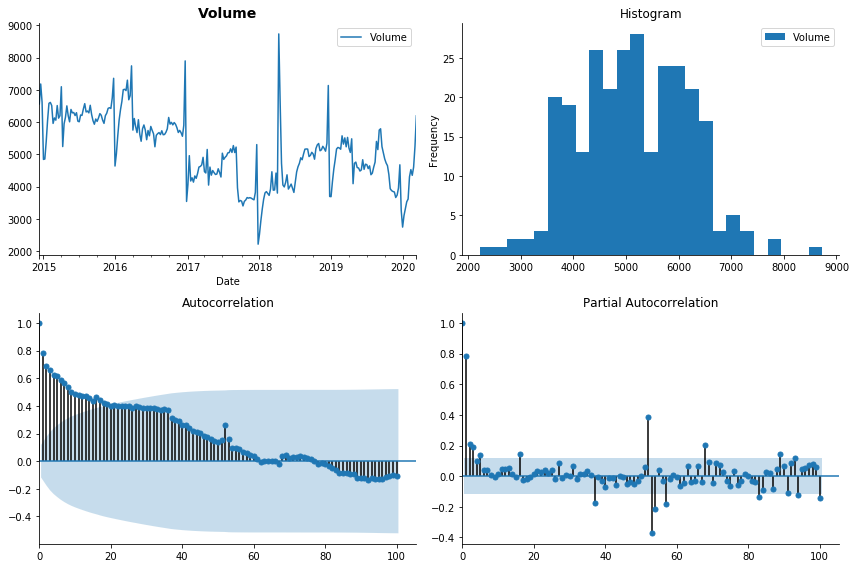

In [31]:
tsplot(sales.dropna(), title=sales.columns[0], lags=100)

autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation.

Large number of time series models require stationarity of the dataset because if the dataset is not stationary, it will hard for the model to capture the trend, which will affect the accuracy of the future predictions. 

In [32]:
# transformation by taking log and differencing
series_transformed=sales.copy()
series_transformed['Volume_transformed']=np.log(sales).diff(1)

(<matplotlib.axes._subplots.AxesSubplot at 0x12511c518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1251c6f98>)

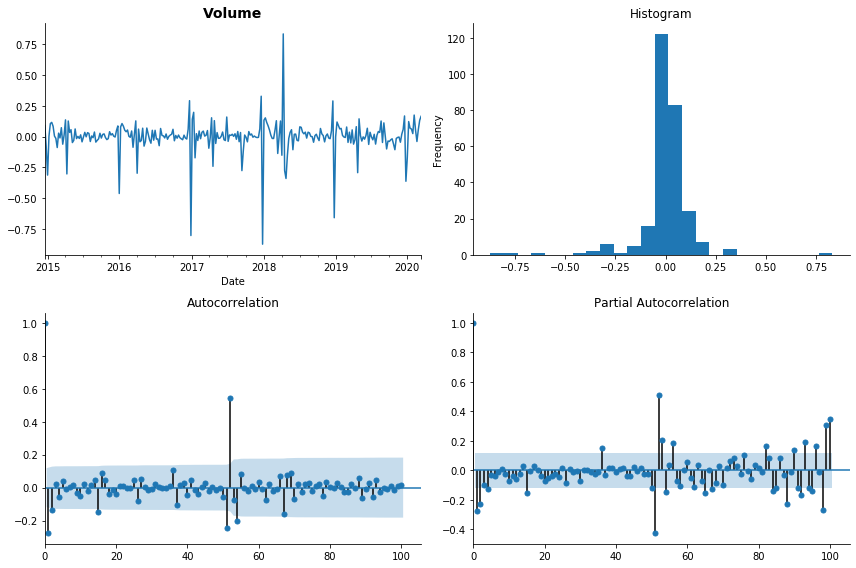

In [33]:
tsplot(series_transformed['Volume_transformed'].dropna(), title=sales.columns[0], lags=100)

In [34]:
#rolling mean and std in a yearly base
rolmean_diff=series_transformed['Volume_transformed'].rolling(window=52).mean()
rolstd_diff=series_transformed['Volume_transformed'].rolling(window=52).std()


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

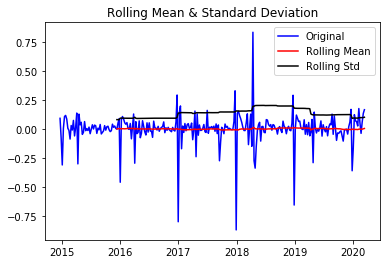

In [35]:
#static graph
origin=plt.plot(series_transformed['Volume_transformed'], color='blue', label='Original')
mean=plt.plot(rolmean_diff, color='red', label='Rolling Mean')
std=plt.plot(rolstd_diff, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
# re-apply ADF test
print('Results of Dickey-Fuller Test:')
dftest=adfuller(series_transformed['Volume_transformed'].dropna(), autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.158473e+01
p-value                        2.885889e-21
#Lags Used                     3.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


Critical values are greater than test statistic, and our p-value is extremely small, which means we are able to reject the null hypothesis. Thus, our dataset is stationary. 

## Simple Exponential Smoothing

Simple exponential smoothing: forecast future values using a weighted average of all previous values in the series.
Exponential smoothing is an intuitive forecasting method that weights the observed time series unequally. Recent observations are weighted more heavily than remote observations.

This model does not require stationarity of a dataset, so we apply the model with original data first to see the accuracy. 

Observations: 275
Training Observations: 248
Testing Observations: 27


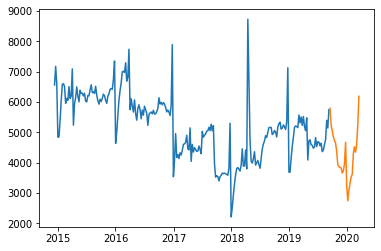

In [37]:
sales_origin=sales.copy()
sales_train_origin=sales_origin[:248]
sales_test_origin=sales_origin[248:]

print('Observations: %d' % (len(sales_origin)))
print('Training Observations: %d' % (len(sales_train_origin)))
print('Testing Observations: %d' % (len(sales_test_origin)))

# then plotting it using different colors
plt.plot(sales_train_origin)
plt.plot(sales_test_origin)
plt.show()

In [38]:
from statsmodels.tsa.api import SimpleExpSmoothing
from pandas import DataFrame

for i in range(1,10,1):
    ses_pred_ori = sales_test_origin.copy()
    ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=i*0.1, optimized=False)
    ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))
    
    rmse_ses_ori=sqrt(mean_squared_error(sales_test_origin.Volume, ses_pred_ori.SES_Ori))
    print("RMSE for Simple Exponential Smoothing α= " + str(i*0.1) + " is: " + str(round(rmse_ses_ori,2)))



RMSE for Simple Exponential Smoothing α= 0.1 is: 1025.13
RMSE for Simple Exponential Smoothing α= 0.2 is: 1111.98
RMSE for Simple Exponential Smoothing α= 0.30000000000000004 is: 1223.91
RMSE for Simple Exponential Smoothing α= 0.4 is: 1325.87
RMSE for Simple Exponential Smoothing α= 0.5 is: 1411.62
RMSE for Simple Exponential Smoothing α= 0.6000000000000001 is: 1482.4
RMSE for Simple Exponential Smoothing α= 0.7000000000000001 is: 1541.89
RMSE for Simple Exponential Smoothing α= 0.8 is: 1594.44
RMSE for Simple Exponential Smoothing α= 0.9 is: 1644.37


<Figure size 576x288 with 0 Axes>

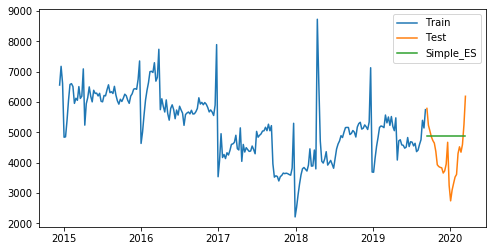

In [39]:
#lowest RMSE with graph
ses_pred_ori = sales_test_origin.copy()
ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))
plt.figure(figsize=(8,4))
plt.plot(sales_train_origin['Volume'], label='Train')
plt.plot(sales_test_origin['Volume'], label='Test')
plt.plot(ses_pred_ori['SES_Ori'], label='Simple_ES')
plt.legend(loc='best')
plt.show()


We found out that RMSE above for different smoothing values are quite large. We consider to remove trend and seasonality to re-apply the model for another forecast. Such large RMSE also prove that Simple Exponential Smoothing model cannot capture the trend and seasonality of a dataset.

In [40]:
sales_origin=np.log(sales).copy()
sales_train_origin=sales_origin[:248]
sales_test_origin=sales_origin[248:]

ses_pred_ori = sales_test_origin.copy()
ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))

ses_pred_ori['Actual_Sales']=np.exp(ses_ori_fit.forecast(len(sales_test_origin)))
ses_pred_ori['Pred_Sales']=np.exp(ses_pred_ori['Volume'])

rmse_ses_ori=sqrt(mean_squared_error(ses_pred_ori['Actual_Sales'], ses_pred_ori['Pred_Sales']))
rmse_ses_ori

1012.3996658227588

Even we use the stationary dataset, we are still got large error, which means the model is not able to capture the trend and seasonality of our data. 

## Holt's Linear Model 

Holt's linear model can only capture the trend, not seasonality.

In [41]:
# Without remove any trend
sales_origin=sales.copy()
sales_train_origin=sales_origin[:248]
sales_test_origin=sales_origin[248:]

print('Observations: %d' % (len(sales_origin)))
print('Training Observations: %d' % (len(sales_train_origin)))
print('Testing Observations: %d' % (len(sales_test_origin)))

Observations: 275
Training Observations: 248
Testing Observations: 27


In [42]:
# apply the model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt

# sales_holt_linear_fit = Holt(np.asarray(sales_train_origin)).fit(smoothing_level = 0.2, smoothing_slope = 0.1, optimized=False)
# sales_pred_holt_linear= sales_holt_linear_fit.forecast(len(sales_test_origin))
# sales_pred_holt_linear

aList=[]
bList=[]
cList=[]

for i in range(1,10,1):
    for j in range(1,10,1): 
        holt_linear_pred = sales_test_origin.copy()

        sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = i*0.1,smoothing_slope = j*0.1, optimized=False)
        holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))
     
        rmse_holt_linear=sqrt(mean_squared_error(sales_test_origin.Volume, holt_linear_pred.Holt_linear))
        aList.append(round(rmse_holt_linear,2))
        bList.append(str(i*0.1))
        cList.append(str(j*0.1))

In [43]:
aList.index(min(aList))

0

In [44]:
"Min RMSE for Holt Linear Forecasting α= " + str(bList[0]) + " and β= " + str(cList[0]) + " is: " + str(aList[0])

'Min RMSE for Holt Linear Forecasting α= 0.1 and β= 0.1 is: 898.02'

<Figure size 576x288 with 0 Axes>

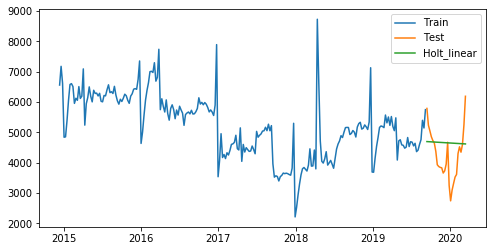

In [45]:
holt_linear_pred = sales_test_origin.copy()

sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1, optimized=False)
holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))
     
plt.figure(figsize=(8,4))
plt.plot(sales_train_origin['Volume'], label='Train')
plt.plot(sales_test_origin['Volume'], label='Test')
plt.plot(holt_linear_pred['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

### Re-apply the model by removing the seasonality through log & diff12

In [46]:
# Remove seasonality by log&diff12
sales_no_season=sales.copy()
sales_no_season['diff1']=np.log(sales_no_season).diff(12)
sales_no_season.head(15)

Volume     diff1
Date                        
2014-12-13  6563.0       NaN
2014-12-20  7179.8       NaN
2014-12-27  6617.0       NaN
2015-01-03  4842.8       NaN
2015-01-10  4856.0       NaN
2015-01-17  5394.5       NaN
2015-01-24  6052.5       NaN
2015-01-31  6581.5       NaN
2015-02-07  6609.3       NaN
2015-02-14  6512.8       NaN
2015-02-21  5958.8       NaN
2015-02-28  6127.3       NaN
2015-03-07  6060.0 -0.079738
2015-03-14  6512.0 -0.097625
2015-03-21  6122.0 -0.077753

Observations: 275
Training Observations: 236
Testing Observations: 27


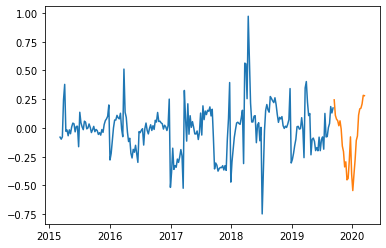

In [47]:
#split training and test
sales_origin=sales.copy()
holt_linear_train=sales_no_season.diff1[:248].dropna()
holt_linear_test=sales_no_season.diff1[248:].dropna()

sales_origin=sales.copy()

print('Observations: %d' % (len(sales_origin)))
print('Training Observations: %d' % (len(holt_linear_train)))
print('Testing Observations: %d' % (len(holt_linear_test)))

# then plotting it using different colors
plt.plot(holt_linear_train)
plt.plot(holt_linear_test)
plt.show()

In [48]:
# Holt's Linear Trend Model

sales_holt_linear_fit = Holt(np.asarray(holt_linear_train)).fit(smoothing_level = 0.1, smoothing_slope = 0.1, optimized=False)
sales_pred_holt_linear= sales_holt_linear_fit.forecast(len(holt_linear_test))
sales_pred_holt_linear

array([-0.01324323, -0.00829   , -0.00333678,  0.00161645,  0.00656967,
        0.0115229 ,  0.01647612,  0.02142935,  0.02638257,  0.03133579,
        0.03628902,  0.04124224,  0.04619547,  0.05114869,  0.05610192,
        0.06105514,  0.06600837,  0.07096159,  0.07591481,  0.08086804,
        0.08582126,  0.09077449,  0.09572771,  0.10068094,  0.10563416,
        0.11058739,  0.11554061])

Volume   pred_value
Date                           
2019-09-14  5792.3  5716.096963
2019-09-21  5239.8  5196.541604
2019-09-28  5053.3  5036.466365
2019-10-05  4858.0  4865.859051
2019-10-12  4733.8  4765.001893
2019-10-19  4649.3  4703.183251
2019-10-26  4377.5  4450.221659
2019-11-02  3935.3  4020.540969
2019-11-09  3876.5  3980.133074
2019-11-16  3849.0  3971.521094
2019-11-23  3834.8  3976.516961
2019-11-30  3663.0  3817.228848
2019-12-07  3734.5  3911.063799
2019-12-14  3957.0  4164.660894
2019-12-21  4676.5  4946.359657
2019-12-28  3255.3  3460.245631
2020-01-04  2746.3  2933.695574
2020-01-11  3101.3  3329.369571
2020-01-18  3320.0  3581.850610
2020-01-25  3530.0  3827.324173
2020-02-01  3616.3  3940.362274
2020-02-08  4304.8  4713.850862
2020-02-15  4527.5  4982.329849
2020-02-22  4350.5  4811.321168
2020-02-29  4605.0  5118.067010
2020-03-07  5255.3  5869.822979
2020-03-14  6193.0  6951.519243

<Figure size 576x288 with 0 Axes>

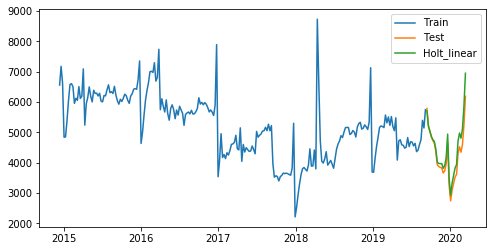

In [49]:
#reverse the forecast to the original unit
sales_org_test=sales[248:]

holt_linear=np.exp(sales_pred_holt_linear)*sales.Volume[248:]
holt_linear=holt_linear.to_frame(name='pred_value')

pred_result_holt_linear=pd.merge(sales_org_test, holt_linear, how='left', on='Date')
pred_result_holt_linear

plt.figure(figsize=(8,4))
plt.plot(sales.Volume[:248], label='Train')
plt.plot(sales.Volume[248:], label='Test')
plt.plot(pred_result_holt_linear['pred_value'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [50]:
#RMSE of holt's linear
rmse_holt_linear=sqrt(mean_squared_error(sales.Volume[248:], holt_linear))
rmse_holt_linear

300.3142933943039

After differencing, the RMSE got much better.

--------------

In [51]:
# # Remove trend by only diff1
# sales_no_trend1=sales.copy()
# sales_no_trend1['diff1']=(sales_no_trend1).diff(12)
# sales_no_trend1.head(15)

In [52]:
# #split training and test
# sales_origin1=sales.copy()
# holt_linear_train1=sales_no_trend1.diff1[:248].dropna()
# holt_linear_test1=sales_no_trend1.diff1[248:].dropna()

# print('Observations: %d' % (len(sales_origin1)))
# print('Training Observations: %d' % (len(holt_linear_train1)))
# print('Testing Observations: %d' % (len(holt_linear_test1)))

# # then plotting it using different colors
# plt.plot(holt_linear_train1)
# plt.plot(holt_linear_test1)
# plt.show()

In [53]:
# # Holt's Linear Trend Model

# sales_holt_linear_fit1 = Holt(np.asarray(holt_linear_train1)).fit(smoothing_level = 0.1, smoothing_slope = 0.1, optimized=False)
# sales_pred_holt_linear1= sales_holt_linear_fit1.forecast(len(holt_linear_test1))
# sales_pred_holt_linear1

In [54]:
# a=np.cumsum(sales_pred--------------_holt_linear1)
# a+sales_no_trend1['diff1'][248:]

--------------

## Holt Winter's Exponential Smoothing Model


This model can capture both trend and seasonlity.

In [55]:
sales_origin=sales.copy()
sales_train_origin=sales_origin[:248]
sales_test_origin=sales_origin[248:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was pro

Text(0, 0.5, 'Volume Sales')

Text(0.5, 0, 'Date')

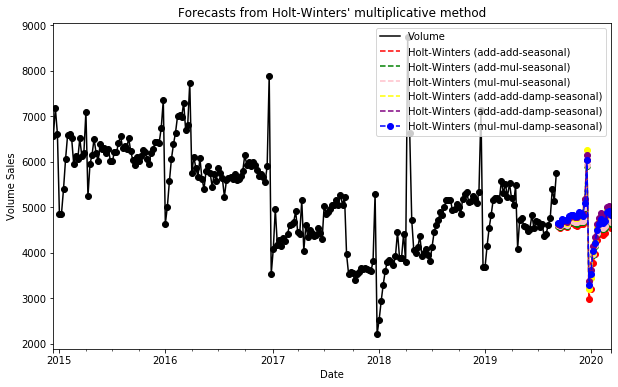

In [56]:
fit1 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
fit2 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
fit3 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
fit4 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
fit5 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
fit6 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)


ax = sales_train_origin.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("Volume Sales")
ax.set_xlabel("Date")
# fit1.fittedvalues.plot(ax=ax, style='--', color='red')
# fit2.fittedvalues.plot(ax=ax, style='--', color='green')
# fit3.fittedvalues.plot(ax=ax, style='--', color='yellow')
# fit4.fittedvalues.plot(ax=ax, style='--', color='blue')

fit1.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(len(sales_test_origin)).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
fit3.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='pink', legend=True)
fit4.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
fit5.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)
fit6.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='blue', legend=True)

plt.show()


In [57]:
rmse_winter1=sqrt(mean_squared_error(sales_test_origin, fit1.forecast(len(sales_test_origin))))
rmse_winter2=sqrt(mean_squared_error(sales_test_origin, fit2.forecast(len(sales_test_origin))))
rmse_winter3=sqrt(mean_squared_error(sales_test_origin, fit3.forecast(len(sales_test_origin))))
rmse_winter4=sqrt(mean_squared_error(sales_test_origin, fit4.forecast(len(sales_test_origin))))
rmse_winter5=sqrt(mean_squared_error(sales_test_origin, fit5.forecast(len(sales_test_origin))))
rmse_winter6=sqrt(mean_squared_error(sales_test_origin, fit6.forecast(len(sales_test_origin))))
print(rmse_winter1)
print(rmse_winter2)
print(rmse_winter3)
print(rmse_winter4)
print(rmse_winter5)
print(rmse_winter6)

738.3425547870582
760.9937831146832
772.0578056902584
832.0867400792526
854.9070981311922
820.7950551285353


Tried all three models with original value/unstationary dataset (without transformation). We can see that the RMSE is actually getting smaller. 

From Simple exponential smoothing: 1012
to Holt's linear: 898
to Holt Winter's: 738.

This can prove that holt winter's is the one that can capture more information than they other two models.

We also apply stationary data (after taking log and differencing) on holt's linear model. We get a small RMSE. Even though the exponential smoothing series models do not require stationarity, but stationarity and only contain the information the model can capture is important.

## Prophet 

In [58]:
from fbprophet import Prophet

Facebook developed an open sourcing Prophet. Facebook provides prophet model not only can take care of some outliers/unusual values, but also it can take care of missing values. It is almost able to fully automatically forecast the trend of the future time series. 

Prophet can deal with missing observations or large outliers, and can roll with the punches in relation to product launches or marketing pushes.

Built in Stan, which is really fast.

Prophet needs a very specific kind of dataframe for it to work on. What we need is:

Date column as ds & Value column as y.

In [59]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [60]:
# load data, rename.headers, and check
prophet_data=mcv_digs[['Date','Volume']]
# prophet_data['Date']=prophet_data.index
prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
prophet_data.head(10)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



ds       y
0 2014-12-13  6563.0
1 2014-12-20  7179.8
2 2014-12-27  6617.0
3 2015-01-03  4842.8
4 2015-01-10  4856.0
5 2015-01-17  5394.5
6 2015-01-24  6052.5
7 2015-01-31  6581.5
8 2015-02-07  6609.3
9 2015-02-14  6512.8

In [61]:
prophet_train=prophet_data[:248]
prediction_size=27

In [62]:
# fit model - baseline model (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
model=Prophet()
model.fit(prophet_train)

# make prediction
future=model.make_future_dataframe(periods=prediction_size, freq='W')
forecast=model.predict(future)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2014-12-13  6478.045975  6327.846951  7889.221542  6478.045975   
1   2014-12-20  6470.801439  6341.639500  7791.738367  6470.801439   
2   2014-12-27  6463.556903  5747.938460  7209.466210  6463.556903   
3   2015-01-03  6456.312367  4873.635367  6376.788118  6456.312367   
4   2015-01-10  6449.067831  4521.066743  6013.085347  6449.067831   
5   2015-01-17  6441.823295  4663.555804  6149.199568  6441.823295   
6   2015-01-24  6434.578758  5295.118377  6828.364421  6434.578758   
7   2015-01-31  6427.334222  5702.995981  7280.664100  6427.334222   
8   2015-02-07  6420.089686  5738.926415  7297.339254  6420.089686   
9   2015-02-14  6412.845150  5571.980695  7084.888886  6412.845150   
10  2015-02-21  6405.600614  5505.620884  7045.393038  6405.600614   
11  2015-02-28  6398.356078  5764.993678  7258.839232  6398.356078   
12  2015-03-07  6391.111542  5895.033599  7415.583595  6391.111542   
13  2015-03-14  6383.867006  5929.442483  7445.952709  6383.867006   
14  2015-03-21  6376.622470  5687.271542  7267.550647  6376.622470   
15  2015-03-28  6369.377934  5676.761781  7204.956141  6369.377934   
16  2015-04-04  6362.133398  5779.053844  7381.743690  6362.133398   
17  2015-04-11  6354.888862  6006.370470  7524.620568  6354.888862   
18  2015-04-18  6347.644326  5919.363047  7511.862743  6347.644326   
19  2015-04-25  6340.399790  5673.089415  7249.798264  6340.399790   
20  2015-05-02  6333.155254  5432.237101  6986.646298  6333.155254   
21  2015-05-09  6325.910718  5288.227120  6796.346057  6325.910718   
22  2015-05-16  6318.666182  5299.911372  6872.422226  6318.666182   
23  2015-05-23  6311.421647  5393.437163  6911.033927  6311.421647   
24  2015-05-30  6304.177111  5365.544465  6839.541245  6304.177111   
25  2015-06-06  6296.932575  5232.214630  6835.432874  6296.932575   
26  2015-06-13  6289.688038  5274.440713  6811.118890  6289.688038   
27  2015-06-20  6282.443502  5295.387102  6845.525325  6282.443502   
28  2015-06-27  6275.198966  5350.072112  6925.520750  6275.198966   
29  2015-07-04  6267.954430  5353.034624  6891.827136  6267.954430   
..         ...          ...          ...          ...          ...   
245 2019-08-24  5037.158214  4654.312755  6182.844010  5037.158214   
246 2019-08-31  5046.096131  4696.545680  6258.792322  5046.096131   
247 2019-09-07  5055.034048  4708.616902  6174.730818  5055.034048   
248 2019-09-08  5056.310893  4667.711480  6121.387833  5056.310893   
249 2019-09-15  5065.248810  4322.563622  5939.548615  5065.248810   
250 2019-09-22  5074.186726  4219.167250  5810.852829  5074.186726   
251 2019-09-29  5083.124643  4260.292177  5848.173812  5082.778224   
252 2019-10-06  5092.062560  4399.744238  5912.136079  5090.801064   
253 2019-10-13  5101.000477  4405.460264  5883.377818  5098.134210   
254 2019-10-20  5109.938394  4366.855718  5929.443096  5105.587929   
255 2019-10-27  5118.876311  4369.232661  5968.811327  5113.040831   
256 2019-11-03  5127.814228  4481.895051  6067.007301  5120.176328   
257 2019-11-10  5136.752144  4572.828403  6134.293077  5126.711921   
258 2019-11-17  5145.690061  4486.848230  5986.908559  5133.210187   
259 2019-11-24  5154.627978  4366.665286  5808.116316  5139.570678   
260 2019-12-01  5163.565895  4425.934722  5864.385727  5146.065614   
261 2019-12-08  5172.503812  4804.206066  6322.384325  5152.221309   
262 2019-12-15  5181.441729  5059.079728  6659.022244  5158.333359   
263 2019-12-22  5190.379646  4936.516380  6437.562356  5164.561983   
264 2019-12-29  5199.317562  4179.155276  5724.195478  5170.209053   
265 2020-01-05  5208.255479  3444.145740  4997.818520  5175.774266   
266 2020-01-12  5217.193396  3204.541417  4725.318618  5181.123246   
267 2020-01-19  5226.131313  3528.422643  5133.788828  5186.284874   
268 2020-01-26  5235.069230  4188.008116  5806.312596  5192.016923   
269 2020-02-02  5244.007147  4614.813332  6155.737486  5198.014048   
270 2020-02-09  5252.9

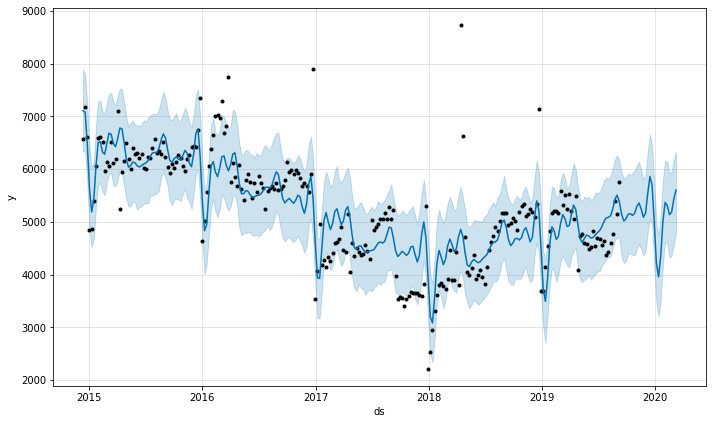

In [63]:
pd.plotting.register_matplotlib_converters()

mod=model.plot(forecast)

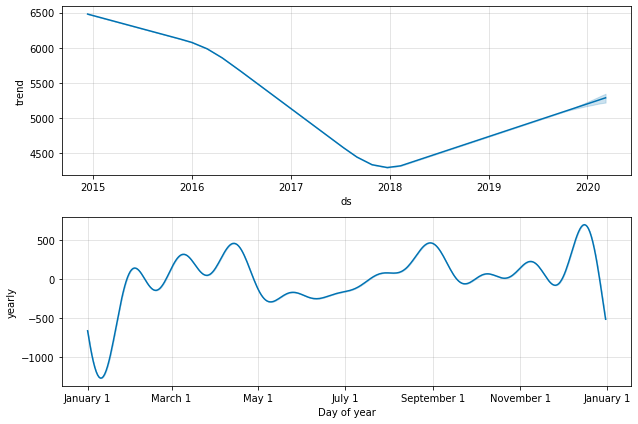

In [64]:
forecast_graph=model.plot_components(forecast)

The default mode for the prophet model is linear growth, we need to make some adjustments for that. 

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Weekly Sales Volume')

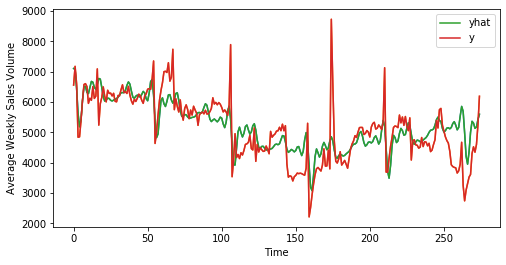

In [65]:
# checking the results
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(forecast['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(prophet_data['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales Volume')
ax.plot(forecast['yhat'], label='yhat')
#ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
#ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(prophet_data['y'], label='y')
ax.legend()
plt.show()

In [66]:
rmse_prophet=sqrt(mean_squared_error(prophet_data['y'], forecast['yhat']))
rmse_prophet

670.3590441087351

### Prophet with Log Transformation 

Forecast above is not based on the stationary dataset, now we can make our time series stationary and see the result.

In [67]:
# log the original dataframe
prophet_log=np.log(prophet_data['y'])
prophet_log=prophet_log.to_frame()
prophet_log['ds']=prophet_data['ds']
prophet_log.head(10)

y         ds
0  8.789203 2014-12-13
1  8.879027 2014-12-20
2  8.797397 2014-12-27
3  8.485248 2015-01-03
4  8.487970 2015-01-10
5  8.593135 2015-01-17
6  8.708227 2015-01-24
7  8.792018 2015-01-31
8  8.796233 2015-02-07
9  8.781525 2015-02-14

In [68]:
prophet_log_train=prophet_log[:248]
prediction_size=27

In [69]:
# fit model - prophet model with logged data (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
model_log=Prophet()
model_log.fit(prophet_log_train)

# make prediction
future_log=model_log.make_future_dataframe(periods=prediction_size, freq='W')
forecast_log=model_log.predict(future_log)
forecast_log

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2014-12-13  8.732231    8.713803    8.992859     8.732231     8.732231   
1   2014-12-20  8.732408    8.704796    8.967781     8.732408     8.732408   
2   2014-12-27  8.732586    8.568911    8.830650     8.732586     8.732586   
3   2015-01-03  8.732763    8.400737    8.666685     8.732763     8.732763   
4   2015-01-10  8.732940    8.335952    8.603811     8.732940     8.732940   
5   2015-01-17  8.733117    8.407407    8.674901     8.733117     8.733117   
6   2015-01-24  8.733295    8.543449    8.807872     8.733295     8.733295   
7   2015-01-31  8.733472    8.629801    8.887996     8.733472     8.733472   
8   2015-02-07  8.733649    8.616595    8.883483     8.733649     8.733649   
9   2015-02-14  8.733827    8.583148    8.842284     8.733827     8.733827   
10  2015-02-21  8.734004    8.571505    8.852978     8.734004     8.734004   
11  2015-02-28  8.734181    8.621975    8.887743     8.734181     8.734181   
12  2015-03-07  8.734358    8.658178    8.931891     8.734358     8.734358   
13  2015-03-14  8.734536    8.648900    8.916928     8.734536     8.734536   
14  2015-03-21  8.734713    8.624450    8.881784     8.734713     8.734713   
15  2015-03-28  8.734890    8.613708    8.886842     8.734890     8.734890   
16  2015-04-04  8.735068    8.641068    8.908035     8.735068     8.735068   
17  2015-04-11  8.735245    8.695829    8.948658     8.735245     8.735245   
18  2015-04-18  8.735422    8.687554    8.950901     8.735422     8.735422   
19  2015-04-25  8.735599    8.637807    8.905216     8.735599     8.735599   
20  2015-05-02  8.735777    8.585293    8.849165     8.735777     8.735777   
21  2015-05-09  8.735954    8.550131    8.816661     8.735954     8.735954   
22  2015-05-16  8.736131    8.559894    8.836804     8.736131     8.736131   
23  2015-05-23  8.736308    8.583423    8.841425     8.736308     8.736308   
24  2015-05-30  8.736486    8.572340    8.843831     8.736486     8.736486   
25  2015-06-06  8.736663    8.571469    8.823829     8.736663     8.736663   
26  2015-06-13  8.736840    8.569830    8.822225     8.736840     8.736840   
27  2015-06-20  8.737018    8.572599    8.840985     8.737018     8.737018   
28  2015-06-27  8.737195    8.579832    8.846959     8.737195     8.737195   
29  2015-07-04  8.737372    8.584531    8.846040     8.737372     8.737372   
..         ...       ...         ...         ...          ...          ...   
245 2019-08-24  8.477281    8.434720    8.701822     8.477281     8.477281   
246 2019-08-31  8.476628    8.438211    8.709289     8.476628     8.476628   
247 2019-09-07  8.475974    8.406020    8.677110     8.475974     8.475974   
248 2019-09-08  8.475881    8.402286    8.674345     8.475881     8.475881   
249 2019-09-15  8.475227    8.356255    8.624300     8.475227     8.475227   
250 2019-09-22  8.474573    8.331410    8.593348     8.474573     8.474573   
251 2019-09-29  8.473919    8.323026    8.594331     8.473441     8.474214   
252 2019-10-06  8.473266    8.339912    8.600629     8.471899     8.474159   
253 2019-10-13  8.472612    8.323413    8.596967     8.470406     8.474312   
254 2019-10-20  8.471958    8.335861    8.601056     8.468554     8.474634   
255 2019-10-27  8.471305    8.332780    8.607529     8.466525     8.474830   
256 2019-11-03  8.470651    8.365731    8.626720     8.464641     8.475434   
257 2019-11-10  8.469997    8.371311    8.651312     8.462224     8.476090   
258 2019-11-17  8.469344    8.338956    8.614343     8.459629     8.477116   
259 2019-11-24  8.468690    8.320983    8.579584     8.457600     8.477916   
260 2019-12-01  8.468036    8.340267    8.601127     8.455236     8.478928   
261 2019-12-08  8.467383    8.405623    8.671855     8.452444     8.480205   
262 2019-12-15  8.466729    8.447749    8.725400     8.449539     8.481154   
263 2019-12-22  8.466075    8.410728    8.676136     8.446480     8.482415   
264 2019-12-29  8.465422    8.2559

In [70]:
# model_log.plot(forecast_log)

In [71]:
# model_log.plot_components(forecast_log)

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Weekly Sales Volume')

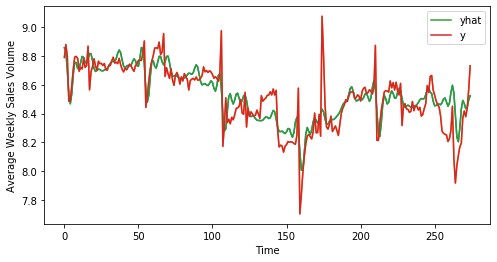

In [72]:
# checking the results
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(forecast_log['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(prophet_log['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales Volume')
ax.plot(forecast_log['yhat'], label='yhat')
#ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
#ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(prophet_log['y'], label='y')
ax.legend()
plt.show()

In [73]:
# get the values back to their original scale
forecast_df=forecast_log[['ds','yhat']]
forecast_df.head()

ds      yhat
0 2014-12-13  8.855780
1 2014-12-20  8.833074
2 2014-12-27  8.698243
3 2015-01-03  8.535841
4 2015-01-10  8.467706

In [74]:
forecast_df['y_log']=prophet_log['y']
forecast_df['sales_pred']=np.exp(forecast_df['yhat'])
forecast_df['sales_origin']=np.exp(forecast_df['y_log'])
forecast_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

ds      yhat     y_log   sales_pred  sales_origin
0 2014-12-13  8.855780  8.789203  7014.818231        6563.0
1 2014-12-20  8.833074  8.879027  6857.336234        7179.8
2 2014-12-27  8.698243  8.797397  5992.374759        6617.0
3 2015-01-03  8.535841  8.485248  5094.114311        4842.8
4 2015-01-10  8.467706  8.487970  4758.588039        4856.0

In [75]:
rmse_prophet_log=sqrt(mean_squared_error(forecast_df['sales_origin'], forecast_df['sales_pred']))
rmse_prophet_log

590.1762915461982

### Prophet with Log Transformation and Seasonal Related Parameters

Now we see the dataset that has been transformed got lower RMSE. However, we still need to add other parameters because we want to capture the yearly peak pattern. We notice the seasonal pattern usually happened at the end of Dec. and April; thus, we will only focus on time around the two main holidays - Xmas and Easter.

In [76]:
# defined dataframe above
prophet_log.head(10)

y         ds
0  8.789203 2014-12-13
1  8.879027 2014-12-20
2  8.797397 2014-12-27
3  8.485248 2015-01-03
4  8.487970 2015-01-10
5  8.593135 2015-01-17
6  8.708227 2015-01-24
7  8.792018 2015-01-31
8  8.796233 2015-02-07
9  8.781525 2015-02-14

In [77]:
prophet_log_train=prophet_log[:248]
prediction_size=27

In [78]:
model_season = Prophet(growth='linear', yearly_seasonality=True, holidays_prior_scale=10)
model_season.add_seasonality(name='monthly', period=27, fourier_order=5)
model_season.add_country_holidays(country_name='UK')

# fit model
model_season.fit(prophet_log_train)
# holiday_prior_scale; seasonality_prior_scale, holidays


# make prediction
future_season=model_season.make_future_dataframe(periods=prediction_size, freq='W')
forecast_season=model_season.predict(future_season)
forecast_season

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2014-12-13  8.729235    8.771564    9.019011     8.729235     8.729235   
1   2014-12-20  8.729473    8.716685    8.970247     8.729473     8.729473   
2   2014-12-27  8.729712    8.605210    8.868767     8.729712     8.729712   
3   2015-01-03  8.729950    8.414692    8.676288     8.729950     8.729950   
4   2015-01-10  8.730189    8.382144    8.645384     8.730189     8.730189   
5   2015-01-17  8.730427    8.424276    8.677675     8.730427     8.730427   
6   2015-01-24  8.730666    8.547602    8.815023     8.730666     8.730666   
7   2015-01-31  8.730904    8.606092    8.860727     8.730904     8.730904   
8   2015-02-07  8.731142    8.634045    8.902503     8.731142     8.731142   
9   2015-02-14  8.731381    8.569447    8.825851     8.731381     8.731381   
10  2015-02-21  8.731619    8.548385    8.809445     8.731619     8.731619   
11  2015-02-28  8.731858    8.578311    8.836210     8.731858     8.731858   
12  2015-03-07  8.732096    8.662028    8.913468     8.732096     8.732096   
13  2015-03-14  8.732335    8.641931    8.895997     8.732335     8.732335   
14  2015-03-21  8.732573    8.587272    8.847293     8.732573     8.732573   
15  2015-03-28  8.732812    8.577878    8.834036     8.732812     8.732812   
16  2015-04-04  8.733050    8.614902    8.878409     8.733050     8.733050   
17  2015-04-11  8.733289    8.666514    8.931096     8.733289     8.733289   
18  2015-04-18  8.733527    8.657405    8.913218     8.733527     8.733527   
19  2015-04-25  8.733765    8.595663    8.865205     8.733765     8.733765   
20  2015-05-02  8.734004    8.566051    8.820717     8.734004     8.734004   
21  2015-05-09  8.734242    8.584556    8.847920     8.734242     8.734242   
22  2015-05-16  8.734481    8.566761    8.818215     8.734481     8.734481   
23  2015-05-23  8.734719    8.584924    8.848048     8.734719     8.734719   
24  2015-05-30  8.734958    8.583566    8.836566     8.734958     8.734958   
25  2015-06-06  8.735196    8.632083    8.875638     8.735196     8.735196   
26  2015-06-13  8.735435    8.579294    8.837976     8.735435     8.735435   
27  2015-06-20  8.735673    8.608537    8.871113     8.735673     8.735673   
28  2015-06-27  8.735912    8.604034    8.857500     8.735912     8.735912   
29  2015-07-04  8.736150    8.626170    8.890688     8.736150     8.736150   
..         ...       ...         ...         ...          ...          ...   
245 2019-08-24  8.488742    8.450312    8.707429     8.488742     8.488742   
246 2019-08-31  8.488429    8.431428    8.711499     8.488429     8.488429   
247 2019-09-07  8.488117    8.460356    8.718891     8.488117     8.488117   
248 2019-09-08  8.488072    8.455898    8.713700     8.488072     8.488072   
249 2019-09-15  8.487760    8.384717    8.639624     8.487760     8.487760   
250 2019-09-22  8.487447    8.337194    8.606246     8.487335     8.487480   
251 2019-09-29  8.487135    8.331385    8.580944     8.486296     8.487518   
252 2019-10-06  8.486823    8.374644    8.637167     8.485296     8.487967   
253 2019-10-13  8.486510    8.367945    8.619427     8.484088     8.488637   
254 2019-10-20  8.486198    8.341827    8.601172     8.482984     8.489096   
255 2019-10-27  8.485885    8.352180    8.609412     8.481279     8.489851   
256 2019-11-03  8.485573    8.403156    8.638298     8.479499     8.491321   
257 2019-11-10  8.485261    8.406677    8.657134     8.477469     8.492209   
258 2019-11-17  8.484948    8.368551    8.621173     8.475677     8.493162   
259 2019-11-24  8.484636    8.326717    8.575517     8.473721     8.494625   
260 2019-12-01  8.484324    8.341202    8.600151     8.472222     8.495979   
261 2019-12-08  8.484011    8.451939    8.702812     8.469891     8.497013   
262 2019-12-15  8.483699    8.461999    8.724770     8.467802     8.497996   
263 2019-12-22  8.483386    8.403277    8.662428     8.465581     8.499783   
264 2019-12-29  8.483074    8.2450

In [79]:
model_season.train_holiday_names

0                                        New Year's Day
1                           New Year Holiday [Scotland]
2                New Year Holiday [Scotland] (Observed)
3                  St. Patrick's Day [Northern Ireland]
4                                           Good Friday
5      Easter Monday [England, Wales, Northern Ireland]
6                                               May Day
7                                   Spring Bank Holiday
8                Battle of the Boyne [Northern Ireland]
9                        Summer Bank Holiday [Scotland]
10    Late Summer Bank Holiday [England, Wales, Nort...
11                          St. Andrew's Day [Scotland]
12                                        Christmas Day
13                             Christmas Day (Observed)
14                                           Boxing Day
15    New Year Holiday [Scotland], New Year's Day (O...
16      St. Patrick's Day [Northern Ireland] (Observed)
17                                Boxing Day (Ob

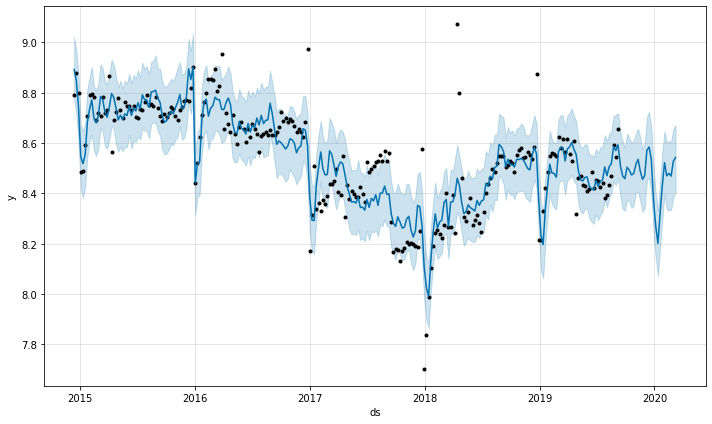

In [80]:
prophet_result=model_season.plot(forecast_season)

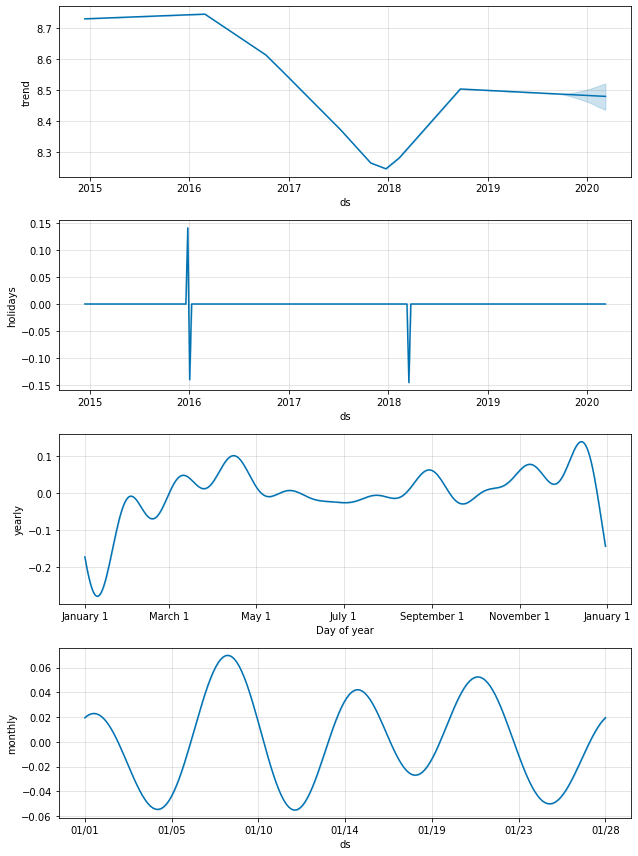

In [81]:
fig=model_season.plot_components(forecast_season)

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Weekly Sales Volume')

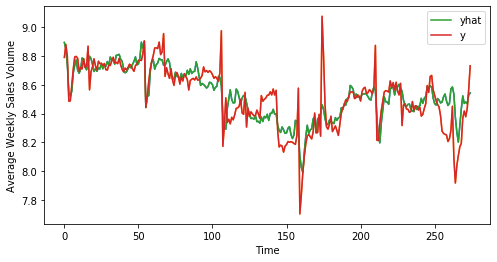

In [82]:
# checking the results
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(forecast_season['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(prophet_log['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales Volume')
ax.plot(forecast_season['yhat'], label='yhat')
#ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
#ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(prophet_log['y'], label='y')
ax.legend()
plt.show()

In [83]:
forecast_season_df=forecast_season[['ds','yhat']]
forecast_season_df.head()

ds      yhat
0 2014-12-13  8.892677
1 2014-12-20  8.848382
2 2014-12-27  8.741862
3 2015-01-03  8.546161
4 2015-01-10  8.518155

In [84]:
forecast_season_df['y_log']=prophet_log['y']
forecast_season_df['sales_pred']=np.exp(forecast_season_df['yhat'])
forecast_season_df['sales_origin']=np.exp(forecast_season_df['y_log'])
forecast_season_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

ds      yhat     y_log   sales_pred  sales_origin
0 2014-12-13  8.892677  8.789203  7278.475430        6563.0
1 2014-12-20  8.848382  8.879027  6963.111931        7179.8
2 2014-12-27  8.741862  8.797397  6259.538913        6617.0
3 2015-01-03  8.546161  8.485248  5146.957457        4842.8
4 2015-01-10  8.518155  8.487970  5004.810253        4856.0

In [85]:
rmse_prophet_log=sqrt(mean_squared_error(forecast_season_df['sales_origin'], forecast_season_df['sales_pred']))
rmse_prophet_log

576.5960113113659

### Transformation and Only focus on Christmas and Easter

In [86]:
easter=pd.DataFrame({
    'holiday': 'Easter',
    'ds': pd.to_datetime(['2014-04-20', '2015-04-05', '2016-03-27', '2017-04-16',
                         '2018-04-01', '2019-04-21', '2020-04-12']),
    'lower_window': -2,
    'upper_window': 5,
})

christmas=pd.DataFrame({
    'holiday': 'Christmas',
    'ds': pd.to_datetime(['2014-12-25','2015-12-25', '2016-12-25', '2017-12-25',
                         '2018-12-25', '2019-12-25', '2020-12-25']),
    'lower_window': -2,
    'upper_window': 7,
})

holidays=pd.concat((easter, christmas))

In [87]:
model_holiday = Prophet(growth='linear', yearly_seasonality=True, holidays=holidays, holidays_prior_scale=10)
# model_holiday.add_seasonality(name='monthly', period=27, fourier_order=5)
# model_holiday.add_country_holidays(country_name='UK')

# fit model
model_holiday.fit(prophet_log_train)

# make prediction
future_holiday=model_holiday.make_future_dataframe(periods=prediction_size, freq='W')
forecast_holiday=model_holiday.predict(future_holiday)
forecast_holiday

# holidays effect display
forecast_holiday[(forecast_holiday['Easter'] + forecast_holiday['Christmas']).abs() > 0][
        ['ds', 'Easter', 'Christmas']][-10:]



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2014-12-13  8.726648    8.698554    8.932643     8.726648     8.726648   
1   2014-12-20  8.726823    8.677276    8.907716     8.726823     8.726823   
2   2014-12-27  8.726998    8.674261    8.912472     8.726998     8.726998   
3   2015-01-03  8.727173    8.430359    8.669078     8.727173     8.727173   
4   2015-01-10  8.727348    8.377746    8.612666     8.727348     8.727348   
5   2015-01-17  8.727523    8.438593    8.675726     8.727523     8.727523   
6   2015-01-24  8.727698    8.553932    8.786671     8.727698     8.727698   
7   2015-01-31  8.727872    8.627391    8.854968     8.727872     8.727872   
8   2015-02-07  8.728047    8.633759    8.860684     8.728047     8.728047   
9   2015-02-14  8.728222    8.605759    8.834229     8.728222     8.728222   
10  2015-02-21  8.728397    8.599348    8.831018     8.728397     8.728397   
11  2015-02-28  8.728572    8.636984    8.872380     8.728572     8.728572   
12  2015-03-07  8.728747    8.676008    8.906752     8.728747     8.728747   
13  2015-03-14  8.728922    8.675418    8.900097     8.728922     8.728922   
14  2015-03-21  8.729097    8.632888    8.863677     8.729097     8.729097   
15  2015-03-28  8.729272    8.610864    8.838057     8.729272     8.729272   
16  2015-04-04  8.729447    8.743486    8.962827     8.729447     8.729447   
17  2015-04-11  8.729622    8.668600    8.900719     8.729622     8.729622   
18  2015-04-18  8.729797    8.679960    8.908186     8.729797     8.729797   
19  2015-04-25  8.729972    8.633819    8.876924     8.729972     8.729972   
20  2015-05-02  8.730147    8.605005    8.834105     8.730147     8.730147   
21  2015-05-09  8.730322    8.571985    8.803424     8.730322     8.730322   
22  2015-05-16  8.730497    8.575394    8.798242     8.730497     8.730497   
23  2015-05-23  8.730672    8.582721    8.812265     8.730672     8.730672   
24  2015-05-30  8.730847    8.590226    8.811280     8.730847     8.730847   
25  2015-06-06  8.731022    8.590579    8.812175     8.731022     8.731022   
26  2015-06-13  8.731197    8.570574    8.800997     8.731197     8.731197   
27  2015-06-20  8.731372    8.569855    8.810528     8.731372     8.731372   
28  2015-06-27  8.731547    8.603018    8.815744     8.731547     8.731547   
29  2015-07-04  8.731721    8.592938    8.836090     8.731721     8.731721   
..         ...       ...         ...         ...          ...          ...   
245 2019-08-24  8.472692    8.439425    8.664742     8.472692     8.472692   
246 2019-08-31  8.471735    8.453404    8.692269     8.471735     8.471735   
247 2019-09-07  8.470778    8.430363    8.657049     8.470778     8.470778   
248 2019-09-08  8.470642    8.429749    8.659337     8.470642     8.470642   
249 2019-09-15  8.469685    8.378284    8.607008     8.469685     8.469685   
250 2019-09-22  8.468728    8.330170    8.566309     8.468694     8.468773   
251 2019-09-29  8.467771    8.331951    8.565775     8.467103     8.468581   
252 2019-10-06  8.466814    8.342360    8.567687     8.465325     8.468592   
253 2019-10-13  8.465857    8.339927    8.578143     8.463375     8.469356   
254 2019-10-20  8.464900    8.342878    8.581037     8.461449     8.470049   
255 2019-10-27  8.463942    8.365517    8.589014     8.459280     8.470825   
256 2019-11-03  8.462985    8.377576    8.607397     8.457335     8.471891   
257 2019-11-10  8.462028    8.372027    8.614122     8.454648     8.472727   
258 2019-11-17  8.461071    8.364600    8.595384     8.452022     8.474222   
259 2019-11-24  8.460114    8.344288    8.576071     8.449849     8.474978   
260 2019-12-01  8.459157    8.361508    8.597958     8.446944     8.475594   
261 2019-12-08  8.458200    8.410608    8.643421     8.443866     8.477256   
262 2019-12-15  8.457243    8.442997    8.669926     8.440621     8.478958   
263 2019-12-22  8.456286    8.385781    8.619217     8.437152     8.480797   
264 2019-12-29  8.455329    8.0549

ds    Easter  Christmas
67  2016-03-26  0.102662   0.000000
106 2016-12-24  0.000000   0.433866
107 2016-12-31  0.000000  -0.227144
122 2017-04-15  0.102662   0.000000
158 2017-12-23  0.000000   0.327683
159 2017-12-30  0.000000  -0.417094
172 2018-03-31  0.102662   0.000000
211 2018-12-29  0.000000  -0.203433
227 2019-04-20  0.102662   0.000000
264 2019-12-29  0.000000  -0.203433

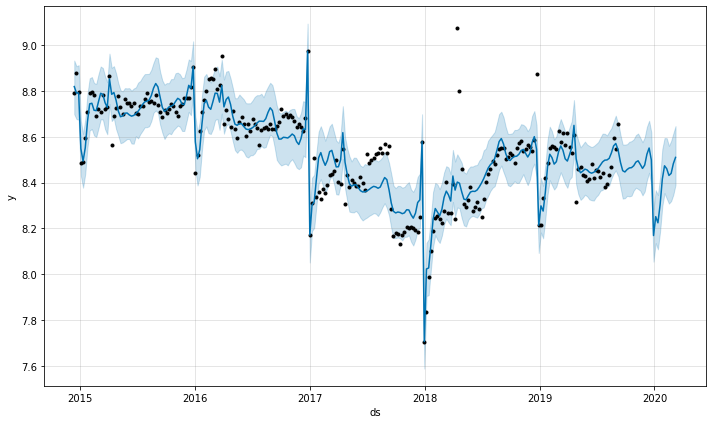

In [88]:
prophet_holiday_result=model_holiday.plot(forecast_holiday)

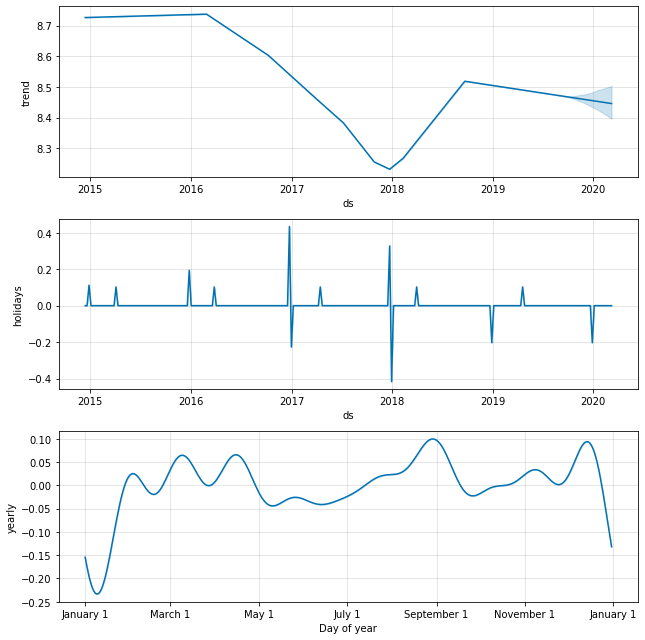

In [89]:
fig2=model_holiday.plot_components(forecast_holiday)

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Weekly Sales Volume')

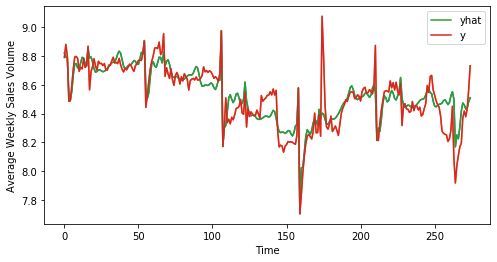

In [90]:
# checking the results
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(forecast_holiday['yhat'])

plt.plot(prophet_log['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales Volume')
ax.plot(forecast_holiday['yhat'], label='yhat')
ax.plot(prophet_log['y'], label='y')
ax.legend()
plt.show()

In [91]:
forecast_holiday_df=forecast_holiday[['ds','yhat']]
forecast_holiday_df.head()

ds      yhat
0 2014-12-13  8.819108
1 2014-12-20  8.791049
2 2014-12-27  8.791185
3 2015-01-03  8.548160
4 2015-01-10  8.493820

In [92]:
forecast_holiday_df['y_log']=prophet_log['y']
forecast_holiday_df['sales_pred']=np.exp(forecast_holiday_df['yhat'])
forecast_holiday_df['sales_origin']=np.exp(forecast_holiday_df['y_log'])
forecast_holiday_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

ds      yhat     y_log   sales_pred  sales_origin
0 2014-12-13  8.819108  8.789203  6762.230099        6563.0
1 2014-12-20  8.791049  8.879027  6575.124668        7179.8
2 2014-12-27  8.791185  8.797397  6576.017278        6617.0
3 2015-01-03  8.548160  8.485248  5157.254568        4842.8
4 2015-01-10  8.493820  8.487970  4884.490679        4856.0

In [93]:
rmse_prophet_holiday=sqrt(mean_squared_error(forecast_holiday_df['sales_origin'], forecast_holiday_df['sales_pred']))
rmse_prophet_holiday

524.554569914849

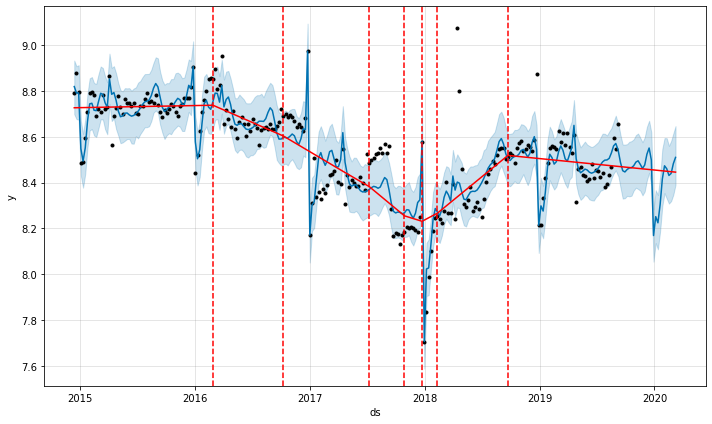

In [94]:
#数据的突变点
from fbprophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

In [95]:
# cross validation (不要)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_holiday, horizon = '180 days')
df_cv.head()


INFO:fbprophet:Making 12 forecasts with cutoffs between 2016-06-24 00:00:00 and 2019-03-11 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2016-06-25  8.570773    8.529593    8.613035  8.625868 2016-06-24
1 2016-07-02  8.545917    8.503289    8.590576  8.676724 2016-06-24
2 2016-07-09  8.548485    8.506150    8.591635  8.656050 2016-06-24
3 2016-07-16  8.564871    8.523390    8.610462  8.637196 2016-06-24
4 2016-07-23  8.570595    8.522877    8.612603  8.563084 2016-06-24

In [96]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 18 days  0.037804  0.194434  0.149345  0.017703  0.012427  0.338710
1 19 days  0.038032  0.195018  0.150248  0.017810  0.012427  0.338710
2 20 days  0.042755  0.206774  0.161512  0.019194  0.012496  0.322581
3 21 days  0.039909  0.199772  0.155483  0.018541  0.012427  0.338710
4 22 days  0.037474  0.193582  0.152291  0.018223  0.012496  0.306452

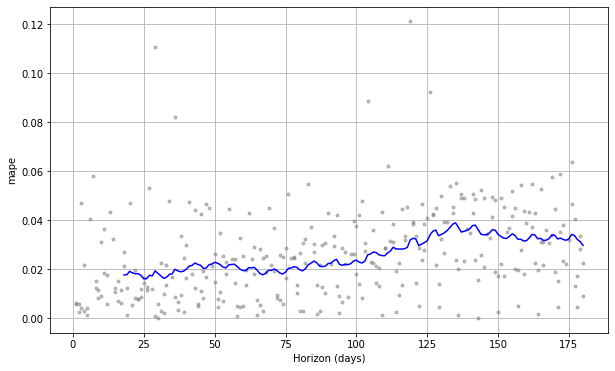

In [97]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


# Machine Learning

Variables:
- Distribution
- Own price elasticity
- Competitor's price elasticity
- Cross price elasticity
- Holidays (binary) 
- Promotion (optional)
- Cannibalization effect: 自家产品价格变动影响自家其他产品销量

In [98]:
easter_list=['2015-04-05', '2016-03-27', '2017-04-16',
                         '2018-04-01', '2019-04-21', '2020-04-12']
xmas_list=['2014-12-25','2015-12-25', '2016-12-25', '2017-12-25',
                         '2018-12-25', '2019-12-25']

In [99]:
#圣诞节的前后五天标记1
xmas_week=(mcv_digs['Date'].dt.month==12) & (mcv_digs['Date'].dt.day <= 30) & (mcv_digs['Date'].dt.day >= 24)
mcv_digs['xmas_week']=xmas_week.to_frame()

#convert boolean to 1 or 0
mcv_digs['xmas_week'] = (mcv_digs['xmas_week']).astype(int)

In [100]:
#圣诞节的前后五天标记1
xmas_after_week=(mcv_digs['Date'].dt.month==1) & (mcv_digs['Date'].dt.day <= 5)
mcv_digs['xmas_after_week']=xmas_after_week.to_frame()

#convert boolean to 1 or 0
mcv_digs['xmas_after_week'] = (mcv_digs['xmas_after_week']).astype(int)

In [101]:
mcv_digs

Date  Units  Volume    Value  Distribution  \
0   2014-12-13  26252  6563.0  23366.0            97   
1   2014-12-20  28719  7179.8  25560.4            97   
2   2014-12-27  26468  6617.0  23557.3            97   
3   2015-01-03  19371  4842.8  17240.9            97   
4   2015-01-10  19424  4856.0  17286.2            97   
5   2015-01-17  21578  5394.5  19187.1            97   
6   2015-01-24  24210  6052.5  21517.5            97   
7   2015-01-31  26326  6581.5  23424.1            97   
8   2015-02-07  26437  6609.3  23498.5            97   
9   2015-02-14  26051  6512.8  23184.1            97   
10  2015-02-21  23835  5958.8  21212.8            97   
11  2015-02-28  24509  6127.3  21813.2            97   
12  2015-03-07  24240  6060.0  21573.0            97   
13  2015-03-14  26048  6512.0  23182.7            97   
14  2015-03-21  24488  6122.0  21795.2            97   
15  2015-03-28  24790  6197.5  22064.1            97   
16  2015-04-04  28382  7095.5  25260.3            97   
17  2015-04-11  20966  5241.5  18658.3            97   
18  2015-04-18  23785  5946.3  21169.7            97   
19  2015-04-25  24601  6150.3  21892.3            97   
20  2015-05-02  26009  6502.3  23147.3            97   
21  2015-05-09  24777  6194.3  22052.4            97   
22  2015-05-16  24034  6008.5  21390.8            97   
23  2015-05-23  25565  6391.3  22753.5            97   
24  2015-05-30  25145  6286.3  22379.8            97   
25  2015-06-06  25186  6296.5  22416.1            97   
26  2015-06-13  24811  6202.8  22080.7            97   
27  2015-06-20  25163  6290.8  22395.4            97   
28  2015-06-27  24110  6027.5  21458.4            97   
29  2015-07-04  24040  6010.0  21395.7            97   
..         ...    ...     ...      ...           ...   
245 2019-08-24  21602  5400.5  19441.5            67   
246 2019-08-31  20591  5147.8  18542.9            67   
247 2019-09-07  23007  5751.8  20705.1            67   
248 2019-09-14  23169  5792.3  20854.3            67   
249 2019-09-21  20959  5239.8  18840.3            67   
250 2019-09-28  20213  5053.3  18176.8            60   
251 2019-10-05  19432  4858.0  17482.8            59   
252 2019-10-12  18935  4733.8  17038.6            58   
253 2019-10-19  18597  4649.3  16733.4            58   
254 2019-10-26  17510  4377.5  15759.6            58   
255 2019-11-02  15741  3935.3  14166.9            58   
256 2019-11-09  15506  3876.5  13946.6            58   
257 2019-11-16  15396  3849.0  13853.2            58   
258 2019-11-23  15339  3834.8  13798.2            58   
259 2019-11-30  14652  3663.0  13182.2            58   
260 2019-12-07  14938  3734.5  13444.2            58   
261 2019-12-14  15828  3957.0  14243.6            58   
262 2019-12-21  18706  4676.5  16835.0            58   
263 2019-12-28  13021  3255.3  11718.9            58   
264 2020-01-04  10985  2746.3   9886.0            58   
265 2020-01-11  12405  3101.3  11163.9            58   
266 2020-01-18  13280  3320.0  11936.7            58   
267 2020-01-25  14120  3530.0  12706.4            58   
268 2020-02-01  14465  3616.3  13016.5            58   
269 2020-02-08  17219  4304.8  17217.5            58   
270 2020-02-15  18110  4527.5  18105.7            58   
271 2020-02-22  17402  4350.5  17400.6            58   
272 2020-02-29  18420  4605.0  18414.6            58   
273 2020-03-07  21021  5255.3  21021.0            58   
274 2020-03-14  24772  6193.0  24765.5            58   

     Promotional Distribution    £/unit      £/kg  year  month month_name  \
0                           0  0.890066  3.560262  2014     12   December   
1                           0  0.890017  3.560043  2014     12   December   
2                           0  0.890029  3.560118  2014     12   December   
3                           0  0.890037  3.560110  2015      1    January   
4                           0  0.889940  3.559761  2015      1    January   
5                           0  0.889197  3.556789  2015      1    January  

In [102]:
#带25号日期的那一周和下一周都标记1
easter_week_2015=(mcv_digs['Date'].dt.year==2015) & (mcv_digs['Date'].dt.month == 4) & (mcv_digs['Date'].dt.day >= 1) & (mcv_digs['Date'].dt.day <= 10)
easter_week_2016=(mcv_digs['Date'].dt.year==2016) & (mcv_digs['Date'].dt.month == 3) & (mcv_digs['Date'].dt.day >= 22) & (mcv_digs['Date'].dt.day <= 31)
easter_week_2017=(mcv_digs['Date'].dt.year==2017) & (mcv_digs['Date'].dt.month == 4) & (mcv_digs['Date'].dt.day >= 11) & (mcv_digs['Date'].dt.day <= 21)
easter_week_2018=(mcv_digs['Date'].dt.year==2018) & (mcv_digs['Date'].dt.month == 4) & (mcv_digs['Date'].dt.day >= 1) & (mcv_digs['Date'].dt.day <= 10)
easter_week_2019=(mcv_digs['Date'].dt.year==2019) & (mcv_digs['Date'].dt.month == 4) & (mcv_digs['Date'].dt.day > 16) & (mcv_digs['Date'].dt.day <= 26)
# easter_week_2020=(mcv_digs['Date'].dt.year==2020) & (mcv_digs['Date'].dt.month == 4) & (mcv_digs['Date'].dt.day >= 7) & (mcv_digs['Date'].dt.day <= 17)


In [103]:
mcv_digs['easter_week_2015']=easter_week_2015.to_frame()
mcv_digs['easter_week_2015']=mcv_digs['easter_week_2015'].astype(int)
mcv_digs['easter_week_2016']=easter_week_2016.to_frame()
mcv_digs['easter_week_2016']=mcv_digs['easter_week_2016'].astype(int)
mcv_digs['easter_week_2017']=easter_week_2017.to_frame()
mcv_digs['easter_week_2017']=mcv_digs['easter_week_2017'].astype(int)
mcv_digs['easter_week_2018']=easter_week_2018.to_frame()
mcv_digs['easter_week_2018']=mcv_digs['easter_week_2018'].astype(int)
mcv_digs['easter_week_2019']=easter_week_2019.to_frame()
mcv_digs['easter_week_2019']=mcv_digs['easter_week_2019'].astype(int)
# mcv_digs['easter_week_2020']=easter_week_2020.to_frame()
# mcv_digs['easter_week_2020']=mcv_digs['easter_week_2020'].astype(int)

In [104]:
mcv_digs

Date  Units  Volume    Value  Distribution  \
0   2014-12-13  26252  6563.0  23366.0            97   
1   2014-12-20  28719  7179.8  25560.4            97   
2   2014-12-27  26468  6617.0  23557.3            97   
3   2015-01-03  19371  4842.8  17240.9            97   
4   2015-01-10  19424  4856.0  17286.2            97   
5   2015-01-17  21578  5394.5  19187.1            97   
6   2015-01-24  24210  6052.5  21517.5            97   
7   2015-01-31  26326  6581.5  23424.1            97   
8   2015-02-07  26437  6609.3  23498.5            97   
9   2015-02-14  26051  6512.8  23184.1            97   
10  2015-02-21  23835  5958.8  21212.8            97   
11  2015-02-28  24509  6127.3  21813.2            97   
12  2015-03-07  24240  6060.0  21573.0            97   
13  2015-03-14  26048  6512.0  23182.7            97   
14  2015-03-21  24488  6122.0  21795.2            97   
15  2015-03-28  24790  6197.5  22064.1            97   
16  2015-04-04  28382  7095.5  25260.3            97   
17  2015-04-11  20966  5241.5  18658.3            97   
18  2015-04-18  23785  5946.3  21169.7            97   
19  2015-04-25  24601  6150.3  21892.3            97   
20  2015-05-02  26009  6502.3  23147.3            97   
21  2015-05-09  24777  6194.3  22052.4            97   
22  2015-05-16  24034  6008.5  21390.8            97   
23  2015-05-23  25565  6391.3  22753.5            97   
24  2015-05-30  25145  6286.3  22379.8            97   
25  2015-06-06  25186  6296.5  22416.1            97   
26  2015-06-13  24811  6202.8  22080.7            97   
27  2015-06-20  25163  6290.8  22395.4            97   
28  2015-06-27  24110  6027.5  21458.4            97   
29  2015-07-04  24040  6010.0  21395.7            97   
..         ...    ...     ...      ...           ...   
245 2019-08-24  21602  5400.5  19441.5            67   
246 2019-08-31  20591  5147.8  18542.9            67   
247 2019-09-07  23007  5751.8  20705.1            67   
248 2019-09-14  23169  5792.3  20854.3            67   
249 2019-09-21  20959  5239.8  18840.3            67   
250 2019-09-28  20213  5053.3  18176.8            60   
251 2019-10-05  19432  4858.0  17482.8            59   
252 2019-10-12  18935  4733.8  17038.6            58   
253 2019-10-19  18597  4649.3  16733.4            58   
254 2019-10-26  17510  4377.5  15759.6            58   
255 2019-11-02  15741  3935.3  14166.9            58   
256 2019-11-09  15506  3876.5  13946.6            58   
257 2019-11-16  15396  3849.0  13853.2            58   
258 2019-11-23  15339  3834.8  13798.2            58   
259 2019-11-30  14652  3663.0  13182.2            58   
260 2019-12-07  14938  3734.5  13444.2            58   
261 2019-12-14  15828  3957.0  14243.6            58   
262 2019-12-21  18706  4676.5  16835.0            58   
263 2019-12-28  13021  3255.3  11718.9            58   
264 2020-01-04  10985  2746.3   9886.0            58   
265 2020-01-11  12405  3101.3  11163.9            58   
266 2020-01-18  13280  3320.0  11936.7            58   
267 2020-01-25  14120  3530.0  12706.4            58   
268 2020-02-01  14465  3616.3  13016.5            58   
269 2020-02-08  17219  4304.8  17217.5            58   
270 2020-02-15  18110  4527.5  18105.7            58   
271 2020-02-22  17402  4350.5  17400.6            58   
272 2020-02-29  18420  4605.0  18414.6            58   
273 2020-03-07  21021  5255.3  21021.0            58   
274 2020-03-14  24772  6193.0  24765.5            58   

     Promotional Distribution    £/unit      £/kg  year  month  ... day  \
0                           0  0.890066  3.560262  2014     12  ...   5   
1                           0  0.890017  3.560043  2014     12  ...   5   
2                           0  0.890029  3.560118  2014     12  ...   5   
3                           0  0.890037  3.560110  2015      1  ...   5   
4                           0  0.889940  3.559761  2015      1  ...   5   
5                           0  0.889197  3.556789  2015      1  ...   5   
6           

In [105]:
#现在圣诞节是两周 之后分别跑两种看看

In [106]:
#圣诞节后一周的销量都会低很多 就圣诞节后面一周再弄一列标成0

limitation: easter这一个节日不是固定的 所以之后的model可能get不到

In [107]:
#先不加price elasticity模拟一下split data
#先删掉没用的列

In [108]:
#drop columns
variables=['year','month','Distribution', 'Promotional Distribution', '£/kg', 'xmas_week', 'xmas_after_week', 'easter_week_2015',
          'easter_week_2016', 'easter_week_2017', 'easter_week_2018', 'easter_week_2019']
final_df=mcv_digs[variables]
# final_df.set_index(final_df.columns[0])

In [109]:
#weekofyear
# df[‘weekofyear’] = df[‘date’].dt.weekofyear

In [110]:
final_df=pd.get_dummies(final_df, columns=['year'], drop_first=True, prefix='year')
final_df=pd.get_dummies(final_df, columns=['month'], drop_first=True, prefix='month')
final_df.head()

Distribution  Promotional Distribution      £/kg  xmas_week  \
0            97                         0  3.560262          0   
1            97                         0  3.560043          0   
2            97                         0  3.560118          1   
3            97                         0  3.560110          0   
4            97                         0  3.559761          0   

   xmas_after_week  easter_week_2015  easter_week_2016  easter_week_2017  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                1                 0                 0                 0   
4                0                 0                 0                 0   

   easter_week_2018  easter_week_2019  ...  month_3  month_4  month_5  \
0                 0                 0  ...        0        0        0   
1                 0                 0  ...        0        0        0   
2                 0                 0  ...        0        0        0   
3                 0                 0  ...        0        0        0   
4                 0                 0  ...        0        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0        0         0         0         1  
1        0        0        0        0         0         0         1  
2        0        0        0        0         0         0         1  
3        0        0        0        0         0         0         0  
4        0        0        0        0         0         0         0  

[5 rows x 27 columns]

In [113]:
# std
from sklearn.preprocessing import StandardScaler
X_standardized = pd.DataFrame(StandardScaler().fit_transform(final_df))

In [114]:
X_standardized.columns = final_df.columns
X_standardized.index = final_df.index
X_standardized.set_index(mcv_digs.Date)
X_standardized.head()

Distribution  Promotional Distribution      £/kg  xmas_week  \
Date                                                                      
2014-12-13      1.115565                       0.0 -0.203433  -0.149348   
2014-12-20      1.115565                       0.0 -0.206718  -0.149348   
2014-12-27      1.115565                       0.0 -0.205600   6.695770   
2015-01-03      1.115565                       0.0 -0.205720  -0.149348   
2015-01-10      1.115565                       0.0 -0.210959  -0.149348   
2015-01-17      1.115565                       0.0 -0.255605  -0.149348   
2015-01-24      1.115565                       0.0 -0.280346  -0.149348   
2015-01-31      1.115565                       0.0 -0.221158  -0.149348   
2015-02-07      1.115565                       0.0 -0.276944  -0.149348   
2015-02-14      1.115565                       0.0 -0.210757  -0.149348   
2015-02-21      1.115565                       0.0 -0.208702  -0.149348   
2015-02-28      1.115565                       0.0 -0.207341  -0.149348   
2015-03-07      1.115565                       0.0 -0.208858  -0.149348   
2015-03-14      1.115565                       0.0 -0.207417  -0.149348   
2015-03-21      1.115565                       0.0 -0.205211  -0.149348   
2015-03-28      1.115565                       0.0 -0.204946  -0.149348   
2015-04-04      1.115565                       0.0 -0.206693  -0.149348   
2015-04-11      1.115565                       0.0 -0.211498  -0.149348   
2015-04-18      1.115565                       0.0 -0.205167  -0.149348   
2015-04-25      1.115565                       0.0 -0.214132  -0.149348   
2015-05-02      1.115565                       0.0 -0.209422  -0.149348   
2015-05-09      1.115565                       0.0 -0.205692  -0.149348   
2015-05-16      1.115565                       0.0 -0.206020  -0.149348   
2015-05-23      1.115565                       0.0 -0.206261  -0.149348   
2015-05-30      1.115565                       0.0 -0.206004  -0.149348   
2015-06-06      1.115565                       0.0 -0.206034  -0.149348   
2015-06-13      1.115565                       0.0 -0.210442  -0.149348   
2015-06-20      1.115565                       0.0 -0.207008  -0.149348   
2015-06-27      1.115565                       0.0 -0.206124  -0.149348   
2015-07-04      1.115565                       0.0 -0.207121  -0.149348   
...                  ...                       ...       ...        ...   
2019-08-24     -0.911618                       0.0  0.392724  -0.149348   
2019-08-31     -0.911618                       0.0  0.425136  -0.149348   
2019-09-07     -0.911618                       0.0  0.389954  -0.149348   
2019-09-14     -0.911618                       0.0  0.398798  -0.149348   
2019-09-21     -0.911618                       0.0  0.327672  -0.149348   
2019-09-28     -1.384627                       0.0  0.348727  -0.149348   
2019-10-05     -1.452200                       0.0  0.375004  -0.149348   
2019-10-12     -1.519773                       0.0  0.383784  -0.149348   
2019-10-19     -1.519773                       0.0  0.380375  -0.149348   
2019-10-26     -1.519773                       0.0  0.395618  -0.149348   
2019-11-02     -1.519773                       0.0  0.392872  -0.149348   
2019-11-09     -1.519773                       0.0  0.359455  -0.149348   
2019-11-16     -1.519773                       0.0  0.381069  -0.149348   
2019-11-23     -1.519773                       0.0  0.365822  -0.149348   
2019-11-30     -1.519773                       0.0  0.374693  -0.149348   
2019-12-07     -1.519773                       0.0  0.393559  -0.149348   
2019-12-14     -1.519773                       0.0  0.387484  -0.149348   
2019-12-21     -1.519773                       0.0  0.392274  -0.149348   
2019-12-28     -1.519773                       0.0  0.392728   6.695770   
2020-01-04     -1.519773                       0.0  0.389839  -0.149348   
2020-01-11     -1.519773             

Distribution  Promotional Distribution      £/kg  xmas_week  \
0      1.115565                       0.0 -0.203433  -0.149348   
1      1.115565                       0.0 -0.206718  -0.149348   
2      1.115565                       0.0 -0.205600   6.695770   
3      1.115565                       0.0 -0.205720  -0.149348   
4      1.115565                       0.0 -0.210959  -0.149348   

   xmas_after_week  easter_week_2015  easter_week_2016  easter_week_2017  \
0        -0.121491         -0.060412         -0.060412         -0.060412   
1        -0.121491         -0.060412         -0.060412         -0.060412   
2        -0.121491         -0.060412         -0.060412         -0.060412   
3         8.231039         -0.060412         -0.060412         -0.060412   
4        -0.121491         -0.060412         -0.060412         -0.060412   

   easter_week_2018  easter_week_2019  ...   month_3   month_4   month_5  \
0         -0.060412         -0.060412  ... -0.309221 -0.294884 -0.287536   
1         -0.060412         -0.060412  ... -0.309221 -0.294884 -0.287536   
2         -0.060412         -0.060412  ... -0.309221 -0.294884 -0.287536   
3         -0.060412         -0.060412  ... -0.309221 -0.294884 -0.287536   
4         -0.060412         -0.060412  ... -0.309221 -0.294884 -0.287536   

    month_6   month_7   month_8   month_9  month_10  month_11  month_12  
0 -0.294884 -0.294884 -0.294884 -0.294884 -0.294884 -0.287536  3.094660  
1 -0.294884 -0.294884 -0.294884 -0.294884 -0.294884 -0.287536  3.094660  
2 -0.294884 -0.294884 -0.294884 -0.294884 -0.294884 -0.287536  3.094660  
3 -0.294884 -0.294884 -0.294884 -0.294884 -0.294884 -0.287536 -0.323137  
4 -0.294884 -0.294884 -0.294884 -0.294884 -0.294884 -0.287536 -0.323137  

[5 rows x 27 columns]

In [123]:
X_standardized.corr()

Distribution  Promotional Distribution      £/kg  \
Distribution                  1.000000                       NaN -0.313379   
Promotional Distribution           NaN                       NaN       NaN   
£/kg                         -0.313379                       NaN  1.000000   
xmas_week                     0.013548                       NaN -0.016828   
xmas_after_week               0.000075                       NaN -0.006021   
easter_week_2015              0.067394                       NaN -0.012487   
easter_week_2016              0.075558                       NaN -0.010021   
easter_week_2017             -0.018333                       NaN -0.012512   
easter_week_2018             -0.038744                       NaN -0.013507   
easter_week_2019             -0.050991                       NaN  0.024057   
year_2015                     0.544972                       NaN -0.100676   
year_2016                     0.590551                       NaN -0.079671   
year_2017                    -0.164737                       NaN -0.144711   
year_2018                    -0.342949                       NaN -0.147387   
year_2019                    -0.507983                       NaN  0.105123   
year_2020                    -0.310222                       NaN  0.746599   
month_2                      -0.061774                       NaN  0.273745   
month_3                      -0.032023                       NaN  0.107700   
month_4                       0.036410                       NaN -0.038357   
month_5                       0.039499                       NaN -0.024640   
month_6                       0.004710                       NaN -0.067054   
month_7                       0.028259                       NaN -0.040820   
month_8                       0.012861                       NaN -0.020057   
month_9                      -0.018839                       NaN -0.037062   
month_10                     -0.002536                       NaN -0.031367   
month_11                     -0.055799                       NaN -0.018429   
month_12                      0.010276                       NaN -0.035770   

                          xmas_week  xmas_after_week  easter_week_2015  \
Distribution               0.013548         0.000075          0.067394   
Promotional Distribution        NaN              NaN               NaN   
£/kg                      -0.016828        -0.006021         -0.012487   
xmas_week                  1.000000        -0.018144         -0.009022   
xmas_after_week           -0.018144         1.000000         -0.007340   
easter_week_2015          -0.009022        -0.007340          1.000000   
easter_week_2016          -0.009022        -0.007340         -0.003650   
easter_week_2017          -0.009022        -0.007340         -0.003650   
easter_week_2018          -0.009022        -0.007340         -0.003650   
easter_week_2019          -0.009022        -0.007340         -0.003650   
year_2015                 -0.008553         0.018898          0.125105   
year_2016                 -0.009867         0.017641         -0.029518   
year_2017                 -0.008553        -0.058667         -0.029173   
year_2018                 -0.008553        -0.058667         -0.029173   
year_2019                 -0.008553         0.018898         -0.029173   
year_2020                 -0.030486         0.130196         -0.012332   
month_2                   -0.047228        -0.038419         -0.019104   
month_3                   -0.046182        -0.037568         -0.018681   
month_4                   -0.044040        -0.035826          0.204868   
month_5                   -0.042943        -0.034933         -0.017371   
month_6                   -0.044040        -0.035826         -0.017815   
month_7                   -0.044040        -0.035826         -0.017815   
month_8                   -0.044040        -0.035826         -0.017815   
month_9                   -0.044040        -0.035826         -0.0

In [115]:
X=X_standardized.values
y=mcv_digs['Volume']


In [116]:
X.shape
y.shape

(275, 27)

(275,)

In [117]:
#train test split
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Observations: %d' % (len(train_index) + len(test_index)))
    print('Training Observations: %d' % (len(train_index))) 
    print('Testing Observations: %d' % (len(test_index))) 
    

# 想想怎么把model放进去 因为train和test是循环
# 应该是要直接加进去的 画图可以删掉

Observations: 95
Training Observations: 50
Testing Observations: 45
Observations: 140
Training Observations: 95
Testing Observations: 45
Observations: 185
Training Observations: 140
Testing Observations: 45
Observations: 230
Training Observations: 185
Testing Observations: 45
Observations: 275
Training Observations: 230
Testing Observations: 45


In [118]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [ ]:
# https://www.kaggle.com/kashnitsky/correct-time-aware-cross-validation-scheme
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)
# RF_Model.fit(X_train, X_test)
cv_scores = cross_val_score(RF_Model, X_train, y_train, cv=splits, n_jobs=None)

In [ ]:
cv_scores

In [121]:
i = 1
score = []
for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for mf in np.linspace(100, 150, 6):
        for ne in np.linspace(50, 100, 6):
            for md in np.linspace(20, 40, 5):
                for msl in np.linspace(30, 100, 8):
                    rfr = RandomForestRegressor(
#                         max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl))
                    rfr.fit(X_train, y_train)
                    score.append([i,
                                  mf, 
                                  ne,
                                  md, 
                                  msl, 
                                  rfr.score(X_train, y_train)])
    i += 1

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=30, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=40, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=50, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=60, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=70, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=80, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=90, n_estimators=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100, n_estimators=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=30)

RandomForestRegressor(max_depth=20, min_samples_leaf=40)

RandomForestRegressor(max_depth=20, min_samples_leaf=50)

RandomForestRegressor(max_depth=20, min_samples_leaf=60)

RandomForestRegressor(max_depth=20, min_samples_leaf=70)

RandomForestRegressor(max_depth=20, min_samples_leaf=80)

RandomForestRegressor(max_depth=20, min_samples_leaf=90)

RandomForestRegressor(max_depth=20, min_samples_leaf=100)

RandomForestRegressor(max_depth=25, min_samples_leaf=30)

RandomForestRegressor(max_depth=25, min_samples_leaf=40)

RandomForestRegressor(max_depth=25, min_samples_leaf=50)

RandomForestRegressor(max_depth=25, min_samples_leaf=60)

RandomForestRegressor(max_depth=25, min_samples_leaf=70)

RandomForestRegressor(max_depth=25, min_samples_leaf=80)

RandomForestRegressor(max_depth=25, min_samples_leaf=90)

RandomForestRegressor(max_depth=25, min_samples_leaf=100)

RandomForestRegressor(max_depth=30, min_samples_leaf=30)

RandomForestRegressor(max_depth=30, min_samples_leaf=40)

RandomForestRegressor(max_depth=30, min_samples_leaf=50)

RandomForestRegressor(max_depth=30, min_samples_leaf=60)

RandomForestRegressor(max_depth=30, min_samples_leaf=70)

RandomForestRegressor(max_depth=30, min_samples_leaf=80)

RandomForestRegressor(max_depth=30, min_samples_leaf=90)

RandomForestRegressor(max_depth=30, min_samples_leaf=100)

RandomForestRegressor(max_depth=35, min_samples_leaf=30)

RandomForestRegressor(max_depth=35, min_samples_leaf=40)

RandomForestRegressor(max_depth=35, min_samples_leaf=50)

RandomForestRegressor(max_depth=35, min_samples_leaf=60)

RandomForestRegressor(max_depth=35, min_samples_leaf=70)

RandomForestRegressor(max_depth=35, min_samples_leaf=80)

RandomForestRegressor(max_depth=35, min_samples_leaf=90)

RandomForestRegressor(max_depth=35, min_samples_leaf=100)

RandomForestRegressor(max_depth=40, min_samples_leaf=30)

RandomForestRegressor(max_depth=40, min_samples_leaf=40)

RandomForestRegressor(max_depth=40, min_samples_leaf=50)

RandomForestRegressor(max_depth=40, min_samples_leaf=60)

RandomForestRegressor(max_depth=40, min_samples_leaf=70)

RandomForestRegressor(max_depth=40, min_samples_leaf=80)

RandomForestRegressor(max_depth=40, min_samples_leaf=90)

RandomForestRegressor(max_depth=40, min_samples_leaf=100)

In [122]:
score

[[1, 100.0, 50.0, 20.0, 30.0, -0.0007184562390487592],
 [1, 100.0, 50.0, 20.0, 40.0, -0.000351428968112133],
 [1, 100.0, 50.0, 20.0, 50.0, -0.0004983313044617521],
 [1, 100.0, 50.0, 20.0, 60.0, -1.3263864555579374e-05],
 [1, 100.0, 50.0, 20.0, 70.0, -1.4671205130767362e-06],
 [1, 100.0, 50.0, 20.0, 80.0, -0.0002048683604018997],
 [1, 100.0, 50.0, 20.0, 90.0, -7.15207653834149e-06],
 [1, 100.0, 50.0, 20.0, 100.0, -4.4114749893964245e-05],
 [1, 100.0, 50.0, 25.0, 30.0, -1.1704387204547473e-05],
 [1, 100.0, 50.0, 25.0, 40.0, -0.0001544490889895389],
 [1, 100.0, 50.0, 25.0, 50.0, -9.486470816510995e-05],
 [1, 100.0, 50.0, 25.0, 60.0, -8.589938750747095e-06],
 [1, 100.0, 50.0, 25.0, 70.0, -0.00013146605808733725],
 [1, 100.0, 50.0, 25.0, 80.0, -0.0003563282514169597],
 [1, 100.0, 50.0, 25.0, 90.0, -3.0025601646332944e-05],
 [1, 100.0, 50.0, 25.0, 100.0, -1.5062606473215112e-06],
 [1, 100.0, 50.0, 30.0, 30.0, -0.00019975891322165928],
 [1, 100.0, 50.0, 30.0, 40.0, -7.24782058920681e-05],
 [1

In [ ]:
# time series split with grid search: https://stackoverflow.com/questions/46732748/how-do-i-use-a-timeseriessplit-with-a-gridsearchcv-object-to-tune-a-model-in-sci

In [ ]:
#outliers, 去掉holidays

In [ ]:
#performance measurement
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#把结果画图比较 https://pythondata.com/forecasting-with-random-forests/

In [ ]:
# LSTM： https://www.kaggle.com/senkin13/lstm-starter

In [ ]:
#之后再试试holiday全部找出来然后单独标1

In [ ]:
#price和sales没有关系所以后面压根没加这个变量: https://www.kaggle.com/sohinibhattacharya86/predict-grocery-sales-rf-xgb